In [4]:
import numpy as np
import keras
from keras.models import Model, Sequential
from keras.layers import Flatten, Embedding, Dense, Activation, Input
import matplotlib.pyplot as plt
import sys

import gzip
import random
from keras import backend as K
from sklearn import manifold
from sklearn.svm import LinearSVC
import math
from itertools import combinations 
from itertools import permutations
from importlib import reload

sys.path.append('/Users/anastasia/Desktop/randtensor')
import utils as u
import randtensor as r
reload(u)
reload(r)

import matplotlib.patches as mpatches



Using TensorFlow backend.


(1, 2)
(1, 3)
(2, 3)


In [28]:
#load the data
train_image_path = '/Users/anastasia/Downloads/train-images-idx3-ubyte.gz'
test_image_path = '/Users/anastasia/Downloads/t10k-images-idx3-ubyte.gz'

train_label_path = '/Users/anastasia/Downloads/train-labels-idx1-ubyte.gz'
test_label_path = '/Users/anastasia/Downloads/t10k-labels-idx1-ubyte.gz'


with gzip.open(train_image_path, 'rb') as f:
    train_image = f.read()
    
f.close()

with gzip.open(test_image_path, 'rb') as f:
    test_image = f.read()
    
f.close()

with gzip.open(train_label_path, 'rb') as f:
    train_label = f.read()
    
f.close()

with gzip.open(test_label_path, 'rb') as f:
    test_label = f.read()
    
f.close()


#one-hot output vectors

###magnitude = np.zeros(48128)
###parity = np.zeros(48128)

#concatenate the vectors:
###outputs = np.concatenate((magnitude, parity))

parity = np.zeros(2).reshape(1, -1)
magnitude = np.zeros(2).reshape(1, -1)

In [29]:
labels = np.frombuffer(train_label, dtype=np.uint8).astype(np.int64)


In [30]:
f = gzip.open(train_label_path,'r')
f.read(8)
buf = f.read(60000)
train_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
f.close()

f = gzip.open(test_label_path,'r')
f.read(8)
buf = f.read(10000)
test_labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
f.close()

In [31]:
data = np.frombuffer(train_image, dtype=np.uint8).astype(np.float32)
data = data[16:47040016]
train_data = data.reshape(60000, 28, 28, 1)

data = np.frombuffer(test_image, dtype=np.uint8).astype(np.float32)
data = data[16:47040016]
test_data = data.reshape(10000, 28, 28, 1)

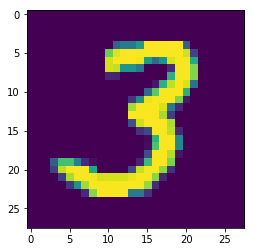

In [32]:
image = np.asarray(train_data[235]).squeeze()
plt.imshow(image)
plt.show()

In [33]:
#create train and test datasets
#train_size should be 48128
#test_size should be 8011

train_image_sample = np.ones((48128, 784))
parity_train_sample = np.ones((2,48128))
magnitude_train_sample = np.ones((2,48128))
train_label = np.ones(48128)

train_magnitudes = np.ones(48128, dtype=object)
train_parities = np.ones(48128, dtype=object)


test_magnitudes = np.ones(8011, dtype=object)
test_parities = np.ones(8011, dtype=object)


test_image_sample = np.ones((8011, 784))
parity_test_sample = np.ones((2,8011))
magnitude_test_sample = np.ones((2,8011))
test_label = np.ones(8011)

sample_size = 0
counter = 0
for a in train_data:
    
    if(train_labels[counter] != 0 and train_labels[counter] != 9):
        train_image_sample[sample_size] = np.reshape(a, (1,784))
        train_label[sample_size] = train_labels[counter]
        
        if train_labels[counter] < 5:
            magnitude_train_sample[0][sample_size] = 0
            train_magnitudes[sample_size] = "low"
        else:
            magnitude_train_sample[1][sample_size] = 0
            train_magnitudes[sample_size] = "high"
            
        if train_labels[counter] % 2 == 0:
            parity_train_sample[0][sample_size] = 0
            train_parities[sample_size] = "even"
        else:
            parity_train_sample[1][sample_size] = 0
            train_parities[sample_size] = "odd"
        
        sample_size += 1
        
        
        
    counter += 1
    
    if (sample_size == 48128):
        break
        

sample_size2 = 0
counter = 0
for a in test_data:
    
    if(test_labels[counter] != 0 and test_labels[counter] != 9):
        test_image_sample[sample_size2] = np.reshape(a, (1,784))
        test_label[sample_size2] = test_labels[counter]
        
        if test_labels[counter] < 5:
            magnitude_test_sample[1][sample_size2] = 0
            test_magnitudes[sample_size2] = "low"
        else:
            magnitude_test_sample[0][sample_size2] = 0
            test_magnitudes[sample_size2] = "high"
            
        if test_labels[counter] % 2 == 0:
            parity_test_sample[1][sample_size2] = 0
            test_parities[sample_size2] = "even"
        else:
            parity_test_sample[0][sample_size2] = 0
            test_parities[sample_size2] = "odd"
        
        sample_size2 += 1
        
    counter += 1
    
    if (sample_size2 == 8011):
        break
    


In [34]:
counts = np.ones(10)
for lab in train_labels:
    counts[int(lab)] +=1
counts

array([5924., 6743., 5959., 6132., 5843., 5422., 5919., 6266., 5852.,
       5950.])

In [35]:
#create train and test datasets
#train_size should be 48128
#test_size should be 8011

train_image_sample2 = np.ones((43360, 784))
parity_train_sample2 = np.ones((2,43360))
magnitude_train_sample2 = np.ones((2,43360))
train_label2 = np.ones(43360)


counts = [0,0,0,0,0,0,0,0]

sample_size = 0

for current_number in range(1,9):
    
    counter = 0
    
    while counter < len(train_labels):
        current_label = train_labels[counter]
            
        if(current_label == current_number):
        
            train_image_sample2[sample_size] = np.reshape(train_data[counter], (1,784))
            train_label2[sample_size] = train_labels[counter]
        
            if train_labels[counter] < 5:
                magnitude_train_sample2[0][sample_size] = 0

            else:
                magnitude_train_sample2[1][sample_size] = 0
                
            if train_labels[counter] % 2 == 0:
                parity_train_sample2[0][sample_size] = 0

            else:
                parity_train_sample2[1][sample_size] = 0
        
            sample_size += 1
            counts[current_number-1] += 1
                
        if counts[current_number-1] == 5420:
            break

        counter += 1
   
        

    

        

In [36]:
counts = np.zeros(8)
for lab in train_label2:
    counts[int(lab)-1] +=1
counts

array([5420., 5420., 5420., 5420., 5420., 5420., 5420., 5420.])

In [49]:
layer2_output_new.shape

(43360, 100)

In [37]:
train_image_sample2_random = np.ones((43360, 784))
train_label2_random = np.ones(43360)
parity_train_sample2_random = np.ones((2,43360))
magnitude_train_sample2_random = np.ones((2,43360))
#random.seed(1)
        
index = range(0, 43360)
index_locations = np.ones(43360)
counter = 0
while len(index) > 0:
    
    random_int = np.random.randint(0, len(index))
    random = index[random_int]
    train_image_sample2_random[counter] = train_image_sample2[random]
    train_label2_random[counter] = train_label2[random]
        
    parity_train_sample2_random[:,counter] = parity_train_sample2[:, random]
    magnitude_train_sample2_random[:,counter] = magnitude_train_sample2[:, random]    
    
    index = np.delete(index, random_int)

    index_locations[counter] = random
    counter +=1
        
    

In [47]:
#go here
layer2_output_new = np.ones((43360, 100))
train_labels2_new = np.ones(43360)

counter = 0
for index in index_locations:
    index1 = int(index)
    
    train_labels2_new[index1] = train_label2_random[counter]
    layer2_output_new[index1] = layer2_output[counter]
    
    
    counter += 1
    

In [50]:
#np.save('/Users/anastasia/Desktop/randtensor/train_labels2_new.npy', train_labels2_new)
np.save('/Users/anastasia/Desktop/randtensor/layer2_output_new.npy', layer2_output_new)

In [ ]:
mag_accuracies = []
parity_accuracies = []

lrs = [0.01, 0.005, 0.001, 0.0005, 0.00001, 0.00005]

for rate in lrs:
    
    model1 = Model()

    inputs = Input(shape=(784,))

    layer1 = Dense(100, activation='tanh')(inputs)
    layer2 = Dense(100, activation='tanh')(layer1)

    parity_output = Dense(2, activation='softmax',name='parity_output')(layer2)
    magnitude_output = Dense(2, activation='softmax', name='magnitude_output')(layer2)


    model1 = Model(inputs=inputs, outputs=[parity_output, magnitude_output])


    model1.compile(keras.optimizers.Adam(lr=rate), loss={'parity_output': 'categorical_crossentropy', 'magnitude_output': 'categorical_crossentropy'})


    
    model1.fit(train_image_sample, [parity_train_sample, magnitude_train_sample], epochs=400)
    
    predictions = model1.predict(test_image_sample)
    
    accuracy = get_accuracy(predictions)
    
    mag_accuracies.append(accuracy[0])
    print(accuracy[0])
    
    parity_accuracies.append(accuracy[1])
    print(accuracy[1])



In [11]:
model = Model()

inputs = Input(shape=(784,))

layer1 = Dense(100, activation='tanh')(inputs)
layer2 = Dense(100, activation='tanh')(layer1)

parity_output = Dense(2, activation='softmax',name='parity_output')(layer2)
magnitude_output = Dense(2, activation='softmax', name='magnitude_output')(layer2)


model = Model(inputs=inputs, outputs=[parity_output, magnitude_output])


model.compile(keras.optimizers.Adam(lr=0.00005), loss={'parity_output': 'categorical_crossentropy', 'magnitude_output': 'categorical_crossentropy'})


In [10]:
#model.fit(train_image_sample, [parity_train_sample.T, magnitude_train_sample.T], epochs=400)

In [14]:
#model.save("/Users/anastasia/Documents/Github/rand_tensor/model.h5")

(48128, 100)

In [199]:
#model = keras.models.load_model("/Users/anastasia/Documents/Github/rand_tensor/model.h5")

(2, 43360)

In [40]:
model2 = Model()

inputs = Input(shape=(784,))

layer1 = Dense(100, activation='tanh')(inputs)
layer2 = Dense(100, activation='tanh')(layer1)

parity_output = Dense(2, activation='softmax',name='parity_output')(layer2)
magnitude_output = Dense(2, activation='softmax', name='magnitude_output')(layer2)


model2 = Model(inputs=inputs, outputs=[parity_output, magnitude_output])

model2.compile(keras.optimizers.Adam(lr=0.00005), loss={'parity_output': 'categorical_crossentropy', 'magnitude_output': 'categorical_crossentropy'})


In [41]:
model2.fit(train_image_sample2_random, [parity_train_sample2_random.T, magnitude_train_sample2_random.T], epochs=400)

Epoch 1/400
43360/43360 [==============================] - 4s 97us/step - loss: 0.8801 - parity_output_loss: 0.4004 - magnitude_output_loss: 0.4797
Epoch 2/400
43360/43360 [==============================] - 4s 83us/step - loss: 0.5669 - parity_output_loss: 0.2447 - magnitude_output_loss: 0.3222
Epoch 3/400
43360/43360 [==============================] - 4s 91us/step - loss: 0.4678 - parity_output_loss: 0.2039 - magnitude_output_loss: 0.2639
Epoch 4/400
43360/43360 [==============================] - 5s 105us/step - loss: 0.4047 - parity_output_loss: 0.1761 - magnitude_output_loss: 0.2287
Epoch 5/400
43360/43360 [==============================] - 4s 101us/step - loss: 0.3627 - parity_output_loss: 0.1606 - magnitude_output_loss: 0.2021
Epoch 6/400
43360/43360 [==============================] - 4s 90us/step - loss: 0.3281 - parity_output_loss: 0.1474 - magnitude_output_loss: 0.1808
Epoch 7/400
43360/43360 [==============================] - 4s 101us/step - loss: 0.3034 - parity_output_loss: 

43360/43360 [==============================] - 4s 81us/step - loss: 0.0205 - parity_output_loss: 0.0101 - magnitude_output_loss: 0.0104 0s - loss: 0.0206 - parity_output_loss: 0.0100 - magnitude_output_loss: 
Epoch 108/400
43360/43360 [==============================] - 3s 77us/step - loss: 0.0180 - parity_output_loss: 0.0089 - magnitude_output_loss: 0.0090
Epoch 109/400
43360/43360 [==============================] - 3s 76us/step - loss: 0.0180 - parity_output_loss: 0.0087 - magnitude_output_loss: 0.0093
Epoch 110/400
43360/43360 [==============================] - 3s 74us/step - loss: 0.0163 - parity_output_loss: 0.0077 - magnitude_output_loss: 0.0085
Epoch 111/400
43360/43360 [==============================] - 3s 75us/step - loss: 0.0170 - parity_output_loss: 0.0083 - magnitude_output_loss: 0.0088
Epoch 112/400
43360/43360 [==============================] - 3s 75us/step - loss: 0.0160 - parity_output_loss: 0.0074 - magnitude_output_loss: 0.0086
Epoch 113/400
43360/43360 [==============

43360/43360 [==============================] - 3s 70us/step - loss: 0.0027 - parity_output_loss: 0.0015 - magnitude_output_loss: 0.0012
Epoch 213/400
43360/43360 [==============================] - 4s 86us/step - loss: 0.0021 - parity_output_loss: 0.0011 - magnitude_output_loss: 9.9095e-04- loss: 0.0021 - parity_output_loss: 0.
Epoch 214/400
43360/43360 [==============================] - 5s 107us/step - loss: 0.0023 - parity_output_loss: 0.0012 - magnitude_output_loss: 0.0011
Epoch 215/400
43360/43360 [==============================] - 5s 122us/step - loss: 0.0036 - parity_output_loss: 0.0015 - magnitude_output_loss: 0.0021
Epoch 216/400
43360/43360 [==============================] - 4s 97us/step - loss: 0.0027 - parity_output_loss: 0.0010 - magnitude_output_loss: 0.0017
Epoch 217/400
43360/43360 [==============================] - 4s 87us/step - loss: 0.0027 - parity_output_loss: 0.0014 - magnitude_output_loss: 0.0013
Epoch 218/400
43360/43360 [==============================] - 4s 95us/

43360/43360 [==============================] - 4s 98us/step - loss: 0.0013 - parity_output_loss: 7.0954e-04 - magnitude_output_loss: 6.3507e-04
Epoch 313/400
43360/43360 [==============================] - 3s 79us/step - loss: 0.0011 - parity_output_loss: 6.0313e-04 - magnitude_output_loss: 5.4117e-04
Epoch 314/400
43360/43360 [==============================] - 4s 91us/step - loss: 8.5977e-04 - parity_output_loss: 4.0943e-04 - magnitude_output_loss: 4.5034e-04
Epoch 315/400
43360/43360 [==============================] - 4s 95us/step - loss: 0.0011 - parity_output_loss: 5.7292e-04 - magnitude_output_loss: 4.9698e-04
Epoch 316/400
43360/43360 [==============================] - 4s 100us/step - loss: 0.0013 - parity_output_loss: 5.1667e-04 - magnitude_output_loss: 7.3761e-04
Epoch 317/400
43360/43360 [==============================] - 4s 81us/step - loss: 0.0013 - parity_output_loss: 8.7739e-04 - magnitude_output_loss: 3.9969e-04
Epoch 318/400
43360/43360 [==============================] - 

In [42]:
model2.save("/Users/anastasia/Documents/Github/rand_tensor/model2_v2.h5")

In [15]:
#model2 = keras.models.load_model("/Users/anastasia/Documents/Github/rand_tensor/model2.h5")
#train_label = train_label2

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [43]:
get_layer_output1 = K.function([model2.layers[0].input],
                                  [model2.layers[1].output])
layer1_output = get_layer_output1([train_image_sample2_random])[0]

get_layer_output2 = K.function([model2.layers[0].input],
                                  [model2.layers[2].output])

layer2_output = get_layer_output2([train_image_sample2_random])[0]


In [44]:
#dark red for 1 and 3, pink for 5 and 7, blue for 2 and 4, dark blue for 6 and 8
colors = np.ones(len(train_label2_random), dtype=object)
index = 0
for lab in train_label2_random:
    if lab == 1 or lab == 3:
        color = 'firebrick'
    if lab == 2 or lab == 4:
        color = 'lightskyblue'
    if lab == 5 or lab == 7:
        color = 'lightcoral'
    if lab == 6 or lab == 8:
        color = 'darkblue'
    colors[index] = color
    index+= 1


In [16]:
shapes = np.ones(len(train_label), dtype=object)
index = 0

for lab in train_label:
    if lab == 1 or lab == 2 or lab == 5 or lab == 6:
        shapes[index] = 'o'
    else:
        shapes[index] = 'v'
        
    index += 1

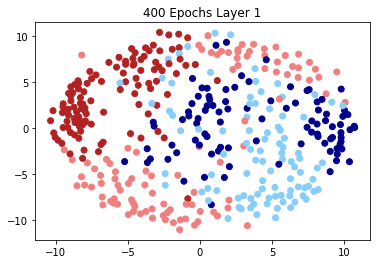

In [45]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(layer1_output[:400])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors[:400])
plt.title("400 Epochs Layer 1")
plt.show()

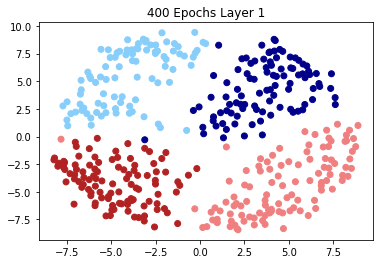

In [46]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(layer2_output[400:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors[400:800])
plt.title("400 Epochs Layer 1")
plt.show()

In [20]:
colors_new = np.ones(len(new_labels), dtype=object)
index = 0
for label in new_labels:
    lab = int(label)
    if lab == 1 or lab == 3:
        color = 'firebrick'
    if lab == 2 or lab == 4:
        color = 'lightskyblue'
    if lab == 5 or lab == 7:
        color = 'lightcoral'
    if lab == 6 or lab == 8:
        color = 'darkblue'
    colors_new[index] = color
    index+= 1


NameError: name 'new_labels' is not defined

In [21]:
layer2_output_new

NameError: name 'layer2_output_new' is not defined

In [659]:
#print(new_dataset[2])
#print(layer2_output_new[10840])

In [705]:
new_dataset = np.ones((43360, 100))
new_labels = np.ones(43360)

counter = 0
for i in range(0,5420):
    start = i
    
    for j in range(0,8):
        
        new_dataset[counter] = layer2_output_new[start + j*5420]
        new_labels[counter] = train_labels2_new[start + j*5420]
        
        counter += 1
    


    
    

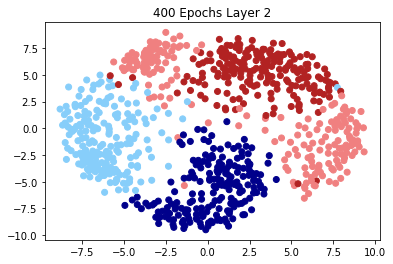

In [706]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(new_dataset[:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors_new[:800])
plt.title("400 Epochs Layer 2")
plt.show()

In [19]:
layer2_output.shape

(43360, 100)

In [209]:
#predictions = model2.predict(test_image_sample2)

In [101]:
#summarize the test data
counts = np.ones(8)
for lab in test_label:
    counts[int(lab)-1] +=1
counts

array([1136., 1033., 1011.,  983.,  893.,  959., 1029.,  975.])

In [14]:
def get_accuracy(predictions):
    mag_predictions = predictions[1].T
    parity_predictions = predictions[0].T
    
    mag_pred = np.ones(len(mag_predictions.T), dtype=object)
    par_pred = np.ones(len(mag_predictions.T), dtype=object)

    #test_magnitudes
    #test_parities
    
    
    for mag in range(len(mag_predictions.T)):
        
        if mag_predictions[0][mag] < 0.5:
            mag_pred[mag] = 'low'
        else:
            mag_pred[mag] = 'high'
            
    for par in range(len(parity_predictions.T)):
        
        if parity_predictions[0][par] < 0.5:
            par_pred[par] = 'even'
        else:
            par_pred[par] = 'odd'
                 
    
    
    mag_count = 0
    parity_count = 0
    for pred in range(len(mag_predictions.T)):

        if mag_pred[pred] == test_magnitudes[pred]: 
            mag_count +=1
            
        if par_pred[pred] == test_parities[pred]: 
            parity_count +=1


            
    
    
    mag_accuracy = mag_count/len(mag_predictions.T)
    parity_accuracy = parity_count/len(mag_predictions.T)

    return (mag_accuracy, parity_accuracy)

In [95]:
#get_accuracy(predictions)

In [22]:
dichotomies = []
digits = [1,2,3,4,5,6,7,8]
first_digit = 1

comb = combinations(digits, 4) 
        
for d in comb:
    d_list = list(d)
    d_list2 = []
    for num in digits:
        if num not in d_list:
            d_list2.append(num)

    
    dichotomies.append((d_list, d_list2))

dichotomies = dichotomies[0:35]


In [29]:
#abstraction index
#ratio of the average between group distance to the average within group distance

def abstraction_index(data, dichotomy = ([1,2,3,4], [5,6,7,8])):
    
    
    labels1 = dichotomy
    label_1a = dichotomy[0]
    label_1b = dichotomy[1]


    indeces = []


    #labels1 = classification of interest, target
    #labels2 = subcategories
    
    for d in dichotomies:
        
        if d[0] != dichotomy[0] and d[0] != dichotomy[1]:
        
            data_1a = [] #even and high

            data_1b = [] #even and low
    
            data_2a = [] #odd and high
    
            data_2b = [] #odd and low
        
            label_2a = d[0]
            label_2b = d[1]
    
            target1 = []
            data1 = []
    
            target2 = []
            data2 = []
    


    
            index = 0
            for row in range(data.shape[0]):
                
                #if labels1[index] == label_1a: #if high
                
                if int(train_label[index]) in label_1a:
            
                    if int(train_label[index]) in label_2a: #if even
                        data_1a.append(data[row])
                    else:
                        data_2a.append(data[row]) #if odd
            
                elif int(train_label[index]) in label_1b: #if low
            
                    if int(train_label[index]) in label_2a: #if even
                        data_1b.append(data[row]) 
                    else:
                        data_2b.append(data[row]) #if odd
            
                index += 1
        

            data_1a = np.array(data_1a)
            data_1b = np.array(data_1b)
            data_2a = np.array(data_2a)
            data_2b = np.array(data_2b)
    
            total_data = np.array([data_1a, data_1b, data_2a, data_2b])
    
            data_1a_mean = np.mean(data_1a)
            data_1b_mean = np.mean(data_1b)
            data_2a_mean = np.mean(data_2a)
            data_2b_mean = np.mean(data_2b)
    
            means = np.array([data_1a_mean, data_1b_mean, data_2a_mean, data_2b_mean])

            between_group = 0
    
            within_group = 0
    

            between_group += np.linalg.norm(data_1a_mean-data_1b_mean)
            between_group += np.linalg.norm(data_1a_mean-data_2b_mean)
            between_group += np.linalg.norm(data_2a_mean-data_2b_mean)
            between_group += np.linalg.norm(data_2a_mean-data_1b_mean)
                


            within_group += np.linalg.norm(data_1a_mean-data_2a_mean)
            within_group += np.linalg.norm(data_1b_mean-data_2b_mean)
            
    
            
            between_group /= 4
            within_group /= 2

            index = between_group/within_group
            
            indeces.append(index)
    
    indeces.sort(reverse = True)
    
    #return np.mean(indeces)
    return indeces[0]

In [3]:
sample_PS2 = []
for d in dichotomies:
    PS_score = p_score(layer2_output, d, train_label2_random)
    print(PS_score, d)
    sample_PS2.append(PS_score)

NameError: name 'dichotomies' is not defined

In [52]:
sample_PS = []
for d in dichotomies:
    PS_score = p_score(layer2_output, d, train_label2_random)
    print(PS_score, d)
    sample_PS.append(PS_score)

0.7752804650798233
0.533272993050831
0.48769877041492504
0.5100851890509494
0.527263161101294
0.8017564330362882
0.49685943497603413
0.281750946678632
0.49039038423283166
0.2554618246563863
0.5309220057005158
0.502660717471523
0.5163157988844268
0.5303538758327925
0.799037867188165
0.5171880922322807
0.8155197367907533
0.5124493753756313
0.2740712112661249
0.5031939568747367
0.5184620781669084
0.4951621344284718
0.49690313843480693
0.2558402919393212
0.8155197367907533 ([1, 2, 3, 4], [5, 6, 7, 8])
0.26869765185217137
0.20028532134484964
0.12073932888864326
0.17776198893505718
0.13994546045052353
0.2911488608388485
0.2124984643910005
0.16328588024553592
0.21127924594337433
0.17067931365303915
0.22924545598117568
0.24656426370941054
0.11158879015667283
0.17641638155057085
0.2478473522045477
0.2005132471491387
0.27059744311090483
0.15273056961152986
-0.0038371356316231776
0.12302818426717402
0.12967093535758567
0.13243056807961837
0.1144176099422473
0.0016720163128853783
0.291148860838848

0.1273529028390038
0.19915814818250813
0.2834021293748501
0.23156275263074605
0.29880061372132677
0.16796970306799042
0.16607808158409054
0.10085489486207871
0.14011007026999867
0.08998281317560465
0.19103404903942375
0.21483745578795255
0.11238004523205011
-0.016710595381037974
0.1000565532382954
-0.01443485198539949
0.1404626133011242
0.146623431166751
0.31325267540170526 ([1, 3, 4, 5], [2, 6, 7, 8])
-0.013682804510788266
0.00628623215346176
-0.009383164290782871
-0.12379185177489163
-0.017571866011943243
-0.13276926097860442
-0.022949429206623597
0.007781964270562602
-0.02184168031277177
-0.13182317515311898
-0.0015648794915517628
-0.143414741071284
0.09788073450754939
0.0060350160760451604
0.11523857650921393
0.004834810185378027
-0.017834302029818228
-0.04016774847519708
-0.013710516029750514
-0.12959958747600114
0.006429309846943981
-0.13377290406650624
-0.1309319231534009
-0.13870155415976343
0.11523857650921393 ([1, 3, 4, 6], [2, 5, 7, 8])
0.2901939149051781
0.25507825913221127

-0.16309680409108088
-0.16523637309826927
-0.19500374491814546
-0.11273162854363022
-0.1423298888384321
-0.16573262686350684
-0.1796800883010911
-0.22792513791756108
-0.2481033334614107
-0.2581300005074165
-0.16665970815132541
-0.13807619866636597
-0.24876615428307253
-0.16367225586280051
-0.26889934647897396
-0.233560437071329
-0.017015283274885874 ([1, 4, 7, 8], [2, 3, 5, 6])
0.23945397280360506
0.2565214681040018
0.11337037636927928
0.13891716668099235
0.21306295639688255
0.23448816876035417
0.10680042474038619
0.15255717655040296
0.11543975053079138
0.030564641446301073
0.20101055281392105
0.14198803884062672
0.10021994813904578
0.1531181019445211
0.2495817789692409
0.17293897444642312
0.23800358425974513
0.13870606198444743
0.13630757789656892
0.13696907082720708
0.23944692309273471
0.1520285497458106
0.13547874469510182
0.018986583496756554
0.2565214681040018 ([1, 5, 6, 7], [2, 3, 4, 8])
0.009416599531293833
0.026562546209657492
-0.138148943643212
-0.0036887038451523264
-0.113987

In [53]:
sample_PS

[0.8155197367907533,
 0.2911488608388485,
 0.042337700980586604,
 0.25866847738861487,
 0.2185858569929186,
 0.18133826044502843,
 0.25695117021202635,
 0.15419344318226733,
 0.2801088178013249,
 0.020789876218579317,
 0.16616774369843312,
 0.0387535836986386,
 -0.05513578357927601,
 0.1849320788835903,
 0.06630903867936702,
 0.31325267540170526,
 0.11523857650921393,
 0.2901939149051781,
 0.16650978364317118,
 0.17335881270538778,
 0.7776222936931968,
 0.1192242225355698,
 0.08597267749369213,
 -0.23434542021300966,
 0.14329271902421015,
 0.03339767137400538,
 0.0575850992186856,
 -0.0781439997172836,
 -0.008954827263013884,
 0.17765084358201388,
 -0.017015283274885874,
 0.2565214681040018,
 0.10849310805036842,
 0.25784746466696057,
 0.12427982263871637]

In [51]:
def dotproduct(v1, v2):
      return sum((a*b) for a, b in zip(v1, v2))

def length(v):
      return math.sqrt(dotproduct(v, v))

def cosine(v1, v2):
      return dotproduct(v1, v2) / (length(v1) * length(v2))
  

In [507]:
    labels1 = ([1,2,3,4], [5,6,7,8])
    label_1a = labels1[0]
    label_1b = labels1[1]
    
    accuracy = []
    
    label_1a_comb = combinations(label_1a, 3)
    label_1b_comb = combinations(label_1b, 3)
    
    label_1a_set = []


In [525]:
dichotomy = ([1,2,3,4], [5,6,7,8])

for a in permutations(dichotomy[0]):
    
    print(a)


(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)


In [23]:
def p_score(data, dichotomy = ([1,2,3,4], [5,6,7,8]), labels = train_label2):
    


    plane_cosine = []


    label1b = dichotomy[1][0]
    label2b = dichotomy[1][1]
    label3b = dichotomy[1][2]
    label4b = dichotomy[1][3]

   
    
    for perm in permutations(dichotomy[0]):   
            
        label1a = perm[0]
        target1 = []
        data1 = []
    
        label2a = perm[1]
        target2 = []
        data2 = []
            
            
        label3a = perm[2]
        target3 = []
        data3 = []
    
    
        label4a = perm[3]
        target4 = []
        data4 = []
    
    
    
    
        for lab in range(len(labels)):
            if int(labels[lab]) == label1a: 
                
                target1.append(0)
        
                data1.append(data[lab])
            
            if int(labels[lab]) == label1b: 
                
                target1.append(1)
        
                data1.append(data[lab])
            
            
            if int(labels[lab]) == label2a: 
                
                target2.append(0)
        
                data2.append(data[lab])
            
            
            if int(labels[lab]) == label2b: 
                
                target2.append(1)
        
                data2.append(data[lab])
            
            
            if int(labels[lab]) == label3a: 
                
                target3.append(0)
        
                data3.append(data[lab])
            
            
            if int(labels[lab]) == label3b: 
                
                target3.append(1)
        
                data3.append(data[lab])
            
            
            if int(labels[lab]) == label4a: 
                
                target4.append(0)
        
                data4.append(data[lab])
            
            
            if int(labels[lab]) == label4b: 
                
                target4.append(1)
        
                data4.append(data[lab])

            
            
    
        target1 = np.array(target1)
        target2 = np.array(target2)
        target3 = np.array(target3)
        target4 = np.array(target4)
    
        data1 = np.array(data1)
        data2 = np.array(data2)
        data3 = np.array(data3)
        data4 = np.array(data4)

            
    
        svc1 = LinearSVC(C=1.0, max_iter = 10000)

        svc1.fit(data1, target1.T)

        vector1 = svc1.coef_[0]
    
    
        svc2 = LinearSVC(C=1.0, max_iter = 10000)
    
        svc2.fit(data2, target2.T)

        vector2 = svc2.coef_[0]
            
            
            
        svc3 = LinearSVC(C=1.0, max_iter = 10000)

        svc3.fit(data3, target3.T)

        vector3 = svc3.coef_[0]
    
    
        svc4 = LinearSVC(C=1.0, max_iter = 10000)
    
        svc4.fit(data4, target4.T)

        vector4 = svc4.coef_[0]
            
            
            #loop for finding 6 cosines
    
        avg_cosine = 0
        
        avg_cosine += cosine(vector1, vector2)/6
            
        avg_cosine += cosine(vector1, vector3)/6
            
        avg_cosine += cosine(vector1, vector4)/6
            
        avg_cosine += cosine(vector2, vector3)/6
            
        avg_cosine += cosine(vector2, vector4)/6
            
        avg_cosine += cosine(vector3, vector4)/6
            
        plane_cosine.append(avg_cosine)
        print(avg_cosine)   
            
    
    plane_cosine.sort(reverse = True)
    
    #return plane_cosine[0]
    return plane_cosine[0]
    
    

In [24]:
def ccgp(data, dichotomy = ([1,2,3,4], [5,6,7,8]), labels = train_label2):
    labels1 = dichotomy
    label_1a = dichotomy[0]
    label_1b = dichotomy[1]
    
    accuracy = []
    
    label_1a_combs = combinations(label_1a, 3)
    label_1b_combs = combinations(label_1b, 3)
    
    
    label_1a_set = []
    label_1b_set = []
    
    
    for a in label_1a_combs:
        
        label_1a_set.append(a)
        
        
    for b in label_1b_combs:
        
        label_1b_set.append(b)
    
    
    for train_a in label_1a_set:
        
        for train_b in label_1b_set:
 
            
            label_2a = labels1[0] #dichotomy a
            label_2b = labels1[1] #dichotomy b
            
            target1 = []
            target2 = []
    
            data_train = []

            data_test = []
            
            for lab in range(len(labels)):
                if int(labels[lab]) in label_2a: #[1,2,3,4]
                
                    if int(labels[lab]) in train_a: #[1,2,3]
                
                        target1.append(0)
                        
                        data_train.append(data[lab])
                
                    else:
                        target2.append(0) #[4]
                        
                        data_test.append(data[lab])
                    
        
                else: #[5,6,7,8]

                    if int(labels[lab]) in train_b:
                
                        target1.append(1)
                        data_train.append(data[lab])
                
                    else:
                        target2.append(1)
            
                        data_test.append(data[lab])
            
    
            target1 = np.array(target1)
            target2 = np.array(target2)
    
            data_train = np.array(data_train)
            data_test = np.array(data_test)

            
            #fit on training data
            svc1 = LinearSVC(C=1.0, max_iter = 10000)

            svc1.fit(data_train, target1.T)
             
            #test on testing data
            acc = svc1.score(data_test, target2.T)
            accuracy.append(acc)

    
    print(accuracy)
    return np.mean(accuracy)         
    
    

In [25]:
sample_ccgp = []
for d in dichotomies:
    ccgp_score = ccgp(layer2_output, d, train_label2_random)
    print(ccgp_score,d)
    sample_ccgp.append(ccgp_score)

[0.9992619926199262, 0.9988929889298893, 1.0, 0.9995387453874539, 0.9980627306273063, 0.9996309963099631, 0.9994464944649446, 0.9996309963099631, 0.9995387453874539, 0.9983394833948339, 0.9997232472324723, 0.9988929889298893, 0.9994464944649446, 0.999169741697417, 1.0, 0.9999077490774908]
0.9993427121771218 ([1, 2, 3, 4], [5, 6, 7, 8])
[0.5165129151291513, 0.3505535055350554, 0.5118081180811808, 0.00046125461254612545, 0.9416974169741698, 0.5052583025830258, 0.9591328413284133, 0.5025830258302583, 0.5385608856088561, 0.00018450184501845018, 0.5469557195571956, 0.5617158671586716, 0.9333025830258302, 0.5054428044280442, 0.9630073800738007, 0.5037822878228783]
0.552559963099631 ([1, 2, 3, 5], [4, 6, 7, 8])
[0.49511070110701105, 0.4752767527675277, 0.4881918819188192, 0.0, 0.4222324723247233, 0.88809963099631, 0.8812730627306273, 0.38699261992619927, 0.43736162361623615, 0.8087638376383763, 0.4859778597785978, 0.5000922509225092, 0.5300738007380074, 0.9731549815498155, 0.7821955719557195,

[0.8489852398523985, 0.5431734317343173, 0.8330258302583026, 0.5626383763837638, 0.5361623616236162, 0.30645756457564577, 0.5142988929889298, 0.25488929889298895, 0.6153136531365314, 0.4497232472324723, 0.611439114391144, 0.44095940959409596, 0.9505535055350554, 0.5552583025830258, 0.9408671586715868, 0.5866236162361623]
0.5968980627306273 ([1, 3, 6, 8], [2, 4, 5, 7])
[0.5002767527675277, 0.00018450184501845018, 0.4790590405904059, 0.4268450184501845, 0.46383763837638375, 0.4979704797047971, 0.4901291512915129, 0.23939114391143912, 0.6927121771217712, 0.4922509225092251, 0.8625461254612546, 0.7256457564575646, 0.8861623616236163, 0.5002767527675277, 0.925830258302583, 0.7523062730627307]
0.5584640221402214 ([1, 3, 7, 8], [2, 4, 5, 6])
[0.5178966789667897, 0.35378228782287824, 0.03523985239852399, 0.5654059040590406, 0.12841328413284134, 0.48219557195571955, 0.3084870848708487, 0.13376383763837638, 0.03856088560885609, 0.05747232472324723, 0.07416974169741697, 0.4798892988929889, 0.0180

In [27]:
sample_ccgp

[0.9993427121771218,
 0.552559963099631,
 0.5658383302583025,
 0.57776176199262,
 0.6142988929889299,
 0.40814690959409594,
 0.5797912822878228,
 0.5598650830258303,
 0.5410055350553505,
 0.22020295202952028,
 0.41806388376383763,
 0.1684905442804428,
 0.2722036439114391,
 0.6002594557195572,
 0.2221517527675277,
 0.5732529981549815,
 0.46316881918819186,
 0.5655788745387453,
 0.547636070110701,
 0.5806964944649446,
 0.9996309963099631,
 0.6198224169741697,
 0.4731665129151292,
 0.5968980627306273,
 0.5584640221402214,
 0.25309040590405907,
 0.5114448800738007,
 0.21053390221402216,
 0.26733740774907755,
 0.5625461254612547,
 0.25630189114391144,
 0.5613180350553506,
 0.565492389298893,
 0.5356088560885609,
 0.4980166051660516]

In [539]:
sample_ccgp2.sort(reverse=True)
plt.scatter(range(0,len(sample_ccgp2)),sample_ccgp2, color = "red")
plt.ylabel("CCGP")
plt.xlabel("Dichotomy Rank")
plt.annotate(xy=[1.6,0.99], s = "magnitude")
plt.annotate(xy=[-0.5,0.93], s = "parity")
plt.show()

NameError: name 'sample_ccgp2' is not defined

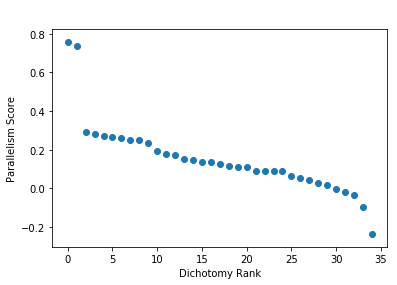

In [540]:
sample_PS2.sort(reverse=True)
plt.scatter(range(0,len(sample_PS2)),sample_PS2)
plt.ylabel("Parallelism Score")
plt.xlabel("Dichotomy Rank")
plt.annotate(xy=[0,0.90], s = "magnitude")
plt.annotate(xy=[1,0.83], s = "parity")
plt.show()

In [609]:
print(train_label2_random[2])
print(train_labels2_new[int(index_locations[2])])

2.0
2.0


In [626]:
#layer2_output_new[int(index_locations[0])]

In [691]:
#layer2_output[0]
layer2_output_new = np.load('/Users/anastasia/Desktop/randtensor/tensor.npy')
layer2_output_new

array([[ 1.1893514 , -0.95416416,  0.87549765, ..., -0.44161402,
         0.47273619,  0.3447289 ],
       [-0.79431973,  0.46787755, -0.88323593, ..., -0.50412536,
         0.47456324,  0.3766982 ],
       [-0.79801331,  0.4472739 , -0.60278021, ..., -0.39554732,
         0.45992208,  0.35969008],
       ...,
       [ 1.02255914,  0.32774454, -0.09147273, ...,  1.12275781,
         0.34629561,  0.24530407],
       [-0.86122724,  0.31401199,  0.50312563, ...,  0.63399669,
         0.33454694,  0.23755416],
       [-0.72956184,  0.33053433, -0.06418654, ...,  0.6835462 ,
         0.34404195,  0.23005076]])

In [692]:
new_dataset = np.ones((43360, 100))
new_labels = np.ones(43360)

counter = 0
for i in range(0,5420):
    start = i
    
    for j in range(0,8):
        
        new_dataset[counter] = layer2_output_new[start + j*5420]
        new_labels[counter] = train_labels2_new[start + j*5420]
        
        counter += 1
    


    
    
    

In [704]:
len(train_labels2_new)

43360

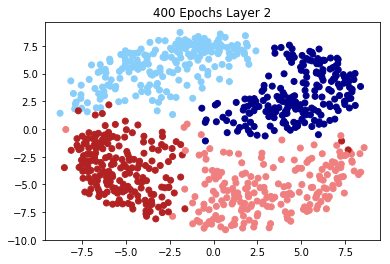

In [693]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(new_dataset[:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors_new[:800])
plt.title("400 Epochs Layer 2")
plt.show()   

In [695]:
#get a T,N,C tensor
T = 5420
C = 8
N = 100

data = np.reshape(layer2_output_new, (T,C,N), order = 'F') 

data = np.swapaxes(data,1,2)

print(data.shape)


#shape is (T,N,C)

(5420, 100, 8)


In [694]:
#np.save('/Users/anastasia/Desktop/randtensor/tensor', layer2_output_new)


In [696]:
###calculate marginal means
#H_T = np.kron(np.kron(np.ones(C), np.ones(N)), np.identity(T))/(NC)

X = data

for t_value in range(T):

    current_mean = np.mean(data[t_value,:,:])
    
    for n_value in range(N):
        
        for c_value in range(C):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
for n_value in range(N):
    
    current_mean = np.mean(data[:,n_value,:])

    for t_value in range(T):
        
        for c_value in range(C):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    
    
for c_value in range(C):

    current_mean = np.mean(data[:,:,c_value])
    
    for n_value in range(N):
        
        for t_value in range(T):
    
            X[t_value, n_value, c_value] = X[t_value, n_value, c_value] - current_mean
    
    

In [697]:
#check for mean-centering
total_sum = 0
current_sum = 0

#mean across T
for n_value in range(N):
    
    for c_value in range(C):
        
        current_sum = X[:,n_value, c_value]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (N*C)

print(np.mean(total_mean))


#mean across N
total_sum = 0
current_sum = 0

for t_value in range(T):
    
    for c_value in range(C):
        
        current_sum = X[t_value,:, c_value]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (T*C)

print(np.mean(total_mean))



#mean across C
total_sum = 0
current_sum = 0

for t_value in range(T):
    
    for n_value in range(N):
        
        current_sum = X[t_value,n_value, :]
        
        total_sum += current_sum
        
        
total_mean = total_sum/ (T*N)

print(np.mean(total_mean))
        
        

9.181799141149387e-19
-1.1032252197360463e-18
-1.3748856565850413e-17


In [722]:
#calculate covariances for 100 x (6000*8) and the 8 x (6000*100) matrices

#(T,N,C) to (N,T,C)
data_N = np.swapaxes(X,0,1)



#(T,N,C) to (C,N,T)
data_C = np.swapaxes(X,0,2)

#shape (N, (T*C))
sigma_N_data = np.reshape(data_N, (N, (T*C)), order = 'f')

#shape (C, (T*N))
sigma_C_data = np.reshape(data_C, (C, (N*T)), order = 'f')

#sigma_N = np.cov(sigma_N_data)
#sigma_C = np.cov(sigma_C_data)


sigma_N = np.zeros((100,100))

for a in range(N):
    
    for b in range(N):
    
        sigma_N[a,b] = np.matmul(sigma_N_data[a,:], sigma_N_data[b,:].T)


sigma_C = np.zeros((8,8))

for a in range(C):
    
    for b in range(C):
    
        sigma_C[a,b] = np.matmul(sigma_C_data[a,:], sigma_C_data[b,:].T)
        
sigma_C_trace = np.trace(sigma_C)
sigma_N_trace = np.trace(sigma_N)
        
        
#sigma_C = sigma_C / np.trace(sigma_C)
#sigma_N = sigma_N / np.trace(sigma_N)



In [702]:
print(np.trace(sigma_C))  
print(np.trace(sigma_N))
print(sigma_C_trace)
print(sigma_N_trace)

1.0
0.9999999999999998
2266838.4355222145
2266838.4355222145


In [723]:
sizes = (N, C)
covs = [sigma_N, sigma_C]

rand = r.randtensor(sizes)
rand.fitMaxEntropy(covs)


fitting max entropy...


0.9999999999999999

In [669]:
surrogate_labels

array([1., 1., 1., ..., 8., 8., 8.])

In [252]:
surrogate_labels = np.ones(8000)

index = 0
for a in range(1,9):
    for b in range(0,1000):
        surrogate_labels[index] = a
        index+=1

In [541]:
#hey

index = 0
#PS_ranks = []

surrogate_datasets = []

CCGP_ranks = np.ones((10,35))
for i in range(10):

    surrogates = rand.sampleTensors(1000)
    dataset = np.stack(surrogates)
    dataset = np.swapaxes(dataset,1,2)
    dataset = np.reshape(dataset, (8000, 100), order = 'f')
    
    surrogate_datasets.append(dataset)
    
    
    CCGP = []
    #PS = []

    for d in dichotomies:
        CCGP_score = ccgp(dataset, dichotomy = d, labels = surrogate_labels)          
        #pscore = p_score(dataset, dichotomy = d, labels = surrogate_labels)
        CCGP.append(CCGP_score)
        #PS.append(pscore)
        #print(pscore)
        print(CCGP_score)
        
    #PS.sort(reverse = True)
    #PS_ranks.append(np.array(PS))
                      
    CCGP.sort(reverse = True)
    CCGP_ranks[index] = np.array(CCGP)
    
    index +=1
    

-0.031000116957049517
-0.025119708992658994
0.006416948981817366
-0.017885226704061525
-0.0030490858570331805
-0.033558251534878
-0.013738577391757267
-0.00829922155371491
-0.0022603152594165756
-0.018844217119480196
-0.01204919395210482
-0.033829375963693085
0.0049629179442797645
-0.019259490713940557
-0.021209379012700872
-0.03708443593364482
-0.023893549154774964
-0.015668444547867835
0.0007577780195245042
-0.029223555775463383
-0.02529250408195062
-0.04651773446239439
-0.018075682397468325
-0.010009393898409873
0.006416948981817366
-0.04043299128791697
-0.02537425991777896
-0.009185432707041958
-0.015380901417169883
0.008306126471404336
-0.013921437547503475
-0.027718920966821735
-0.012276856932267224
-0.019068418958629693
-0.0240453640703088
-0.001582765773966773
-0.022120445890454574
-0.008275957815473283
-0.014824321168620116
-0.03048263146629077
-0.035045872231340786
-0.004280150704252265
-0.0021319727847785505
0.0016355086996006473
-0.02130972669423231
-0.02112590788581763
-0.

-0.04416785731269705
-0.04104425752449299
-0.029654977945965156
-0.0499368060826208
-0.035823168301278935
-0.058985710075692616
-0.017677374531062835
0.023571001374450052
0.03562956026384742
0.019535083490506762
0.0344179783028108
0.042452249947206463
0.04621707306375654
-0.007687646662845698
0.005210337169337779
0.0002484018176435463
-0.01368025751843384
0.023994082160077066
-0.0023877275947397844
-0.004209132919531325
0.010943937874727937
0.007318734336577958
-0.006804334159557408
0.030114164884506738
0.0008719118396617632
0.004117380826013647
0.006887708815905643
0.016179755407501856
-0.010498867544939845
0.015108109310017364
-0.013809804286268513
0.04621707306375654
-0.015376242227436873
-0.0008782082745669596
-0.01650760001774023
-0.005157730845337677
0.00791783702765134
0.005603648501012295
-0.03412190437730358
-0.019836185378688392
-0.02907999091561067
-0.03222483958449657
-0.005096221415146247
-0.022316521120813636
-0.028921621007243867
-0.018347712973431515
-0.0229990828076495

0.025394543311281884
0.028758238416520115
0.023261158030868055
0.027778427524517986
0.024381580871499373
0.030425972571414446
0.016106930864742436
0.0159695984319125
0.012146350709597659
0.020565836922890834
0.004618083615231741
0.00961975971551535
0.008557415413210794
0.004710718143825976
0.030364175772610323
0.03435038917308196
0.02314355349547475
0.022357951435221478
0.035830979538985945
0.03201220757909893
0.04306166338503056
-0.010231625840701166
0.0033454244429410645
-0.00580329970232913
0.015507931754303046
-0.0024341139257892646
0.0061353433443512885
-0.028706166785442765
-0.015274024550531624
-0.020907337198006797
0.004556666923571604
-0.01680993380088387
-0.005613465731658085
-0.03635105919951069
-0.015018277975087086
-0.031792265472565806
-0.00721236713857458
-0.0157291619706796
-0.01313334247266876
-0.026748159107563244
-0.018097731201239885
-0.023196216813231984
-0.011941096140420701
-0.011203309575046224
-0.0075787367340276295
0.015507931754303046
-0.07176939961694015
-0.

-0.010678649440383874
-0.0456772955460871
-0.031903712007972686
0.013925084998563049
0.10032862770093831
0.06165016498681161
0.07769608378767148
0.062154011915990674
0.04929382198002539
0.0715130069046017
0.10750957276457243
0.06867705778159772
0.0813146669666355
0.06929442322469764
0.05176963086481873
0.07965083088240721
0.07885512609883569
0.06313323283987063
0.07395537355445811
0.06263372664410982
0.045849076884012095
0.05119941497859438
0.050649918286422534
0.07180699472945348
0.04574181126399554
0.07313879975987264
0.04629663882990846
0.0515011132821923
0.10750957276457243
-0.04743904649681048
-0.03653140369458152
-0.05410046634739296
-0.030938918329603788
-0.04120888525839166
-0.028627008716193593
-0.03930036213157481
-0.028004128643492908
-0.052703064291015775
-0.035728625300307446
-0.039792654892619496
-0.03365715893730252
-0.059234803418364096
-0.03681305740098063
-0.06731364881163682
-0.05118895912436462
-0.048637214860713374
-0.05447278320614436
-0.05664643363185684
-0.04384

0.016162646291056355
0.003419401539023875
-0.0008806249739406764
0.010496443407652021
-0.01770424919308862
0.006774570201150028
0.0070103302455933394
0.02843882021232359
-0.010254361247346692
0.03575267203477439
-0.0043628791652742804
0.0202495482267377
0.062260155103169665
0.03234363334738125
-0.0017274451104492953
0.009855631845389293
-0.0022558374347202374
-0.00804145801143584
0.01376260776298469
0.007280381116433119
-0.027481299827316587
-0.025166617675971392
-0.039494251656479594
-0.04249897960840572
-0.022023998418165724
-0.0019907290102267657
-0.015488275283992948
-0.011270593710393989
-0.024871429896565524
-0.029987390968353518
-0.030550459697947816
-0.011926500524460983
0.010072030763129935
-0.021643647697423468
-0.0010186911851261307
-0.02223903263670903
-0.024267401663040006
0.03234363334738125
-0.01103053129500204
0.005418617415880969
-0.02836577532661799
-0.023874659740847532
-0.013950889046806627
-0.02505910966529637
-0.028314383256805298
-0.012912921874125613
-0.05426286

7.031249419997901e-05
-0.010155637428346227
0.015234042777484053
0.03502106272772882
0.014228327289766697
0.04388380342251735
0.04480941374791735
0.0338408748820757
0.025130997869724017
0.013986459365860753
0.023821515107324238
0.02335111684023123
0.054691886431104425
0.0759511930481226
0.019281892487633217
0.00874723448034321
0.06524667958125296
0.033609497902329616
0.04357021079527215
0.07474594864923245
0.008054142213710053
0.007678413211497015
0.054677129883345874
0.023219747646417783
0.0759511930481226
-0.017922007362306463
-0.020269793434618825
-0.017258913695564246
-0.029318107289728508
-0.015153845966854124
-0.024392365644800053
-0.023930398162688712
-0.027193844531052495
-0.017641290416881235
-0.007258530783888254
-0.016038047526016428
-0.0025333917675040077
0.005485363729143776
-0.00596964303551
0.012408642652611093
0.022862584040921133
0.005637177613700969
0.02745367855932506
-0.02424194193274598
-0.03311255798176235
-0.01808826735027331
-0.004086101829751269
-0.027048957867

-0.02728715335594808
-0.04857778916147935
-0.02025106133897422
-0.025560941887089694
-0.0018980773489489892
-0.05146735431797917
-0.047315149484007425
-0.04150640708153873
-0.062486095722534926
-0.01946340913471599
-0.04385431863020282
-0.060661489501900645
-0.05676547138679721
-0.05794817616670161
-0.05444117093307817
-0.035834844498687485
-0.036741258170430544
-0.022997324811180688
-0.043434064131515224
-0.02957225457420193
-0.025380509784050445
-0.02168598903883753
0.00044752340368924004
-0.03229615460163811
-0.057309378309909426
-0.040893211112365366
-0.04081238255075348
-0.05448564970475643
-0.030629525205897904
0.00044752340368924004
0.02709616898289035
0.01877510670195104
0.03952091746696194
0.05487529354965865
-0.0023375196661175428
0.022078883389558292
0.026063152475429757
0.01719726048219075
0.05575098556125715
0.07157165057050192
0.013714817143456941
0.03960207904142491
-0.013749794476994643
0.0008908823691311431
0.004644121885794308
0.01968879725328241
-0.002580134095723364

-0.028908821516242744
-0.02675105110244216
-0.004319546191233321
0.009051059941331131
-0.019734861553879216
-0.009460248061005497
-0.04374582259090343
-0.06290481564844337
-0.018779717622316876
-0.024897452898068235
-0.03394260276285138
-0.023222569320713024
0.009051059941331131
-0.04661204057726572
-0.032222811944015994
-0.03772583347560694
-0.00030338293929575016
-0.059210724143209936
-0.03745822930237501
-0.04341815195015192
-0.029033805966088084
-0.012562937468714687
-0.007342095367583712
-0.03386437144574029
-0.04315890982572844
-0.03430077432292522
0.0026801007818654105
-0.012501159656597666
-0.00702090467549964
-0.001872865996589177
-0.03401332645730409
-0.03715312284820186
-0.014946130176580145
-0.015798779595463337
-0.023849862159628893
0.016000928913491478
-0.016046895721544493
0.016000928913491478
0.09314021119263616
0.06237864864724528
0.09876513115128754
0.07607939207264768
0.06722345103374919
0.07567041287292264
0.0793699083187604
0.048496228189555665
0.13433466815166048


0.03493884517165171
0.04817929291393658
0.061485602202469826
0.027930312534362622
0.08940662821955717
0.04211680504382697
0.0563002945922762
0.04341711604118733
0.05780837715167542
0.036599208626327394
0.10251786772378416
0.05520259044078772
0.0653107907726838
0.03990717760403951
0.034888715750489734
0.04730013525536151
0.07843402936543015
0.06552278446065432
0.07453251335173322
0.04973748275532683
0.10251786772378416
-0.07144160155581203
-0.06038283480520072
-0.0821245826007868
-0.055068247697189605
-0.10257926732885653
-0.0882725957265637
-0.08914783933434328
-0.07877673962080782
-0.06566266505222752
-0.06110333025390578
-0.08711453069273206
-0.09279700682139294
-0.08904970712925818
-0.0632481948624763
-0.054602985693496524
-0.05084585793965885
-0.07187242661934051
-0.09292681264773996
-0.0931747797812422
-0.07886340738228485
-0.059657116100577
-0.06561810561176325
-0.05408298017474161
-0.07518469683516052
-0.05084585793965885
-0.00017792485637548733
0.011409082541304277
0.0228884024

-0.013245907218459025
-0.026787191765298028
0.003934742377008307
0.0015587137649396214
-0.01255867333697783
-0.017381538099993696
-0.02512618021016656
0.0022938178108946232
0.008360785095855347
0.01617355165977318
0.0021559978728271333
0.002830209829863371
-0.007893501709922602
0.023026529109178184
0.02529768807027699
-0.009570237014422094
-0.017873627431403402
-0.00370385339193394
-0.014713069479293477
0.0034046424569872114
0.0004938263741697257
0.007987637151510605
0.01396736795059157
0.014545507759295152
0.01781010518892412
0.0009965072724060203
-0.00120564265469977
0.02529768807027699
0.0015928068812251124
0.00027958872775723717
-0.009562171622457804
-0.0014216144305491014
0.009390938368564646
0.01934640156830247
0.006255052972233239
0.005242047401347389
0.005401639400512517
0.012751856085791428
0.02543194329957385
0.03458983270021344
-0.012192062832123679
-0.00412840968554707
-0.0021286665445413386
0.005781117378929864
0.015737213223315866
0.015825973956108078
0.009708761781648784

-0.038506162503908266
-0.04165436373639335
-0.06642296284752255
-0.06717934920906808
-0.07214778715196705
-0.06245384990656297
-0.04789105327103619
-0.03664583181082381
-0.05673968240889275
-0.0718184135388372
-0.0627285460543212
-0.066949564173892
-0.05311859813982539
-0.04286583442965595
-0.03664583181082381
-0.03051339877703496
-0.0114090292034299
-0.021989944535437553
-0.010142728031198738
-0.0199297845219567
-0.02655578120510347
-0.0256002221552811
-0.006187373272938745
0.0033669331071559516
0.004638525428416674
0.004636189049594015
-0.012600749147610692
-0.03777841409912123
-0.026147174195245985
-0.017742538443217493
-0.016269425199342966
-0.01362414336346665
-0.0243477377012597
-0.015137244010346319
-0.022044706931316257
0.00444243061923617
-0.01320389989773714
0.007607346697600744
-0.003971482461333501
0.007607346697600744
-0.03289287838496399
-0.027361122990271457
-0.03175528641329678
-5.315623133106406e-05
-0.03826878442543501
-0.01093956246250152
-0.022813213286112282
-0.016

0.01944275191555911
0.032698754406467925
0.031051178689211558
0.031487786579123836
0.03294323647069174
0.048263996546137125
-0.001658790217765601
0.03579646141632229
0.010303853490162973
0.03283039474123395
0.035035697678369865
0.049627278005736915
0.010826053234583079
0.04838663471380275
0.011682888103192752
0.034574358296691594
0.0483300083076205
0.0477601547434345
0.0231656008510977
0.046308141304120996
0.012380425909897148
0.03625283581323642
0.049627278005736915
-0.04259691744051022
-0.025599014283772314
-0.02694747030356267
-0.013367740262437233
-0.031068698910012897
-0.034353418641431405
-0.04431446289893175
-0.026781196247290515
-0.04880695032506143
-0.01644960540718369
-0.05325732834058968
-0.038453724136619176
-0.033451751951171525
-0.019587672627282133
-0.05412973534266854
-0.02134457537814204
-0.046415571046446724
-0.028712483299141788
-0.02396632880049224
-0.027662883381603498
-0.04512609194085841
-0.029969883493634216
-0.03245915499942384
-0.014668365040893968
-0.01336774

0.001483596096628079
-0.01374709008913065
-0.009510174263285074
-0.008816477108447036
0.013083134346162055
0.03417880180508936
0.0502115663531879
0.04170643814674213
0.05524178760101937
0.05160415721712914
0.049190506548137995
0.043232093611158956
0.05912345014042576
0.03373023760030894
0.048172850625187155
0.04381562898061314
0.04275225777426309
0.051351149486994985
0.06474104400326168
0.03424273356036922
0.047795343697325736
0.04859409204921762
0.0494565348015056
0.061804127327734604
0.05917531302092531
0.04534992568085581
0.04297760176157838
0.050061330467123244
0.05071541447088537
0.06474104400326168
0.045538032828441266
0.014088447880496378
0.057571748491234045
0.014731361630781415
0.02287275936976508
0.011258611481564571
0.04598721040158075
0.014875993384538343
0.036406387766576995
-0.0004323825851489764
0.002983353456484863
-0.0039727852112240395
0.06903362575740715
0.025375722502625767
0.047058624296443745
0.00890428631199389
0.01255952591645938
0.01675339188229466
0.0267204919

-0.031278062546367606
-0.04441645583511229
-0.05703129184596303
-0.045022409351064635
-0.04102093613096719
-0.01465260285199417
0.014914574187915005
-0.03772925900998785
-0.011751533773025168
-0.037777557533310156
-0.04154038716406369
-0.01477695354454014
0.019672950244690887
0.01708175322459953
0.02619450811919401
0.03581518761291976
0.02412342681722565
0.03672568370358313
0.01714266596699309
0.017456159553420097
0.026922910212015715
0.020239527021206564
0.02804582680649531
0.02235973978306007
0.020806257457288764
0.023413397582320847
0.0122428591829421
0.007933479308015889
0.014569311943928343
0.008571341762251022
0.026930832094743114
0.037856906291615346
0.018467472921118982
0.022847379916328354
0.020166978917222984
0.02089478506776072
0.03927145068802654
0.03927145068802654
-0.02863493230874161
-0.04540672996445813
0.0018733756456237453
-0.03947079931435598
-0.02436546977612289
-0.04971616877985342
-0.024325674630277412
-0.040582069338899705
-0.02268031190477214
-0.0524241066177088

-0.0027455781105900686
0.0301452073785519
0.004904671246890266
0.017394688562360146
-0.019723774072532195
0.029622060204234385
-0.02447469992735015
0.01275749861926027
0.011090247044007835
0.055721226923044494
-0.0014057736689600878
0.04700449189710838
0.013890123693860558
0.018119660351898548
0.004995803246730414
0.03770915083049303
-0.00855966616340834
0.029179990949842388
0.012424907078077994
0.017118883600807735
0.055721226923044494
-0.010135688961619791
-0.013633106129037013
-0.015968645342589155
-0.0017918940246132338
-0.02970774838338725
-0.012615540294452648
-0.02008271038266718
-0.024096456847539284
-0.02908577833812705
-0.011387556416013014
-0.044077088969991914
-0.023310632212196335
-0.005755768051838112
0.007753362249227354
-0.008361129941311614
0.008786189756126873
-0.011714874452697914
-0.008736058387495818
-0.02203364910983845
-0.004850488651984258
-0.02650173996015296
-0.005363004371305704
-0.013543077801471255
-0.009884268066737829
0.008786189756126873
0.06527604215509

0.031969591993577455
0.005326512579109086
-0.012083270730492014
-0.007048817414097982
0.031969591993577455
-0.052453959071117495
-0.04526147484056291
-0.06469954974678276
-0.04388807073636753
-0.06929943028931329
-0.055939373037948936
-0.06167899437991596
-0.053999560354756074
-0.06858308646075129
-0.03121636301889599
-0.0737851218362173
-0.043166524437176154
-0.05237608617533199
-0.03195318895662427
-0.04622738120228448
-0.0099985913912751
-0.05034917371078831
-0.03319906507249186
-0.06665655637395665
-0.0527087729043438
-0.06061380109424708
-0.031046057353298163
-0.0581988176305536
-0.04242529238325077
-0.0099985913912751
-0.05108198059591613
-0.03791245771169932
-0.05109285105496446
-0.0333412565877699
-0.07240931724240791
-0.06596869336940607
-0.06109989499562496
-0.04938991480421606
-0.05344975358397192
-0.02557399440952653
-0.07414449997429466
-0.05748600567526031
-0.042764805336029846
-0.025332473142017788
-0.03412310478688797
-0.005542227888758503
-0.05012459209938656
-0.039812

-0.026399220640079414
-0.033468852701693225
-0.03609618087871457
-0.02372529543357208
-0.035646037161993084
-0.016070955629752
-0.03352130594773731
-0.025722014422053935
-0.02580109194342384
-0.04107094031456285
-0.026890056413344687
-0.03411860657550188
-0.04014443673203269
-0.03233773001817036
0.010535202696602375
-0.004419537468216383
-0.0039032785297394975
0.024931014626124237
-0.003256743529788714
0.030719550258092896
0.0022508599566565743
-0.007836969930890593
-0.008178695970173231
-0.015135355656938545
-0.02409537860548049
-0.009314476658468688
-0.017924593130213447
0.023480939489637188
-0.0041057699177918724
-0.013177464380473123
-0.02130276149413473
-0.005912428922927388
0.013676697251534458
0.01973867550467484
-0.008079829686790389
-0.016517330131792123
-0.024822959970136525
-0.01587044016731501
0.003997588526667472
0.030719550258092896
-0.03059609901066493
-0.03668578619606461
-0.010673971982364108
-0.03459595109238399
-0.005527918175011033
-0.022197430969134836
-0.030670768

0.0024905449401234053
0.012302337408940359
0.02079727138125543
0.018683292451708265
0.0013665056197247685
0.013708444015224312
-0.011597643447738863
-0.01005555440592298
0.0065979103188205475
-0.0031568852195554566
-0.0020182989071247
0.006983677194492615
-0.004105452223904798
-0.003484979026172447
0.0006787879305606998
-0.006813618155154017
0.01588721488470663
0.012985684541346115
0.01422790565298273
0.003205524504180409
0.00017022071663108825
-0.007817727849379641
0.026027442019756063
-0.04162527119770346
-0.04253066789326401
-0.0444041495370903
-0.041063373766883036
-0.050486271238699885
-0.04596067623353005
-0.032646654304060115
-0.03368055713394903
-0.03056605712971236
-0.041908549227192005
-0.03687026183246189
-0.04743919076899819
-0.03170945542035404
-0.02745509665826331
-0.027107390951491048
-0.038291918279110715
-0.031315273115341824
-0.046762120230439054
-0.0436157938017936
-0.03902626778361515
-0.0386609574088014
-0.049512889855488684
-0.03750718097278688
-0.0524158505181308

-0.06036114062563891
-0.07007104058266969
-0.08013273083437371
-0.06768263459197149
-0.08065986611761052
-0.05521233213517662
-0.04543548289239564
-0.04827370892491146
-0.06607469492344806
-0.045685286864987726
-0.08109295497561161
-0.056487783603353554
-0.037129472937105515
-0.0071035717335106935
-0.025297850363780846
-0.01141969941468331
-0.030195564445413978
-0.017583481766713288
-0.018908065033201454
-0.014738882999584424
-0.032033377713714416
-0.027702623725787887
-0.026773740962293048
-0.03294066547421184
-0.01542940110695387
-0.028624867647940342
-0.0484581002452574
-0.03782389593210552
-0.03761685001870723
-0.04910033024446434
-0.02870550276745873
-0.01930646876961535
-0.020671208648353714
-0.029358923940876563
-0.010088263659915936
-0.03406797884120205
-0.013108175999396432
-0.0071035717335106935
0.034666997653539935
0.04273956573905732
0.04774960484161335
0.04063820504014605
0.05599424880288956
0.04193369654360444
0.03803395493257999
0.0460616463933303
0.05367057509070092
0.0

-0.005177487682453373
-0.006853684346763488
-0.003838909066721758
0.010632225556740618
-0.003093213116370332
0.013056976690184813
-0.005375684485373558
-0.006052428518771514
0.006306030451671187
0.00260454023134903
0.006135654340162153
0.004710914697091888
-0.004624118606724542
0.010405638202544865
0.004665129068496475
0.001665724952927613
0.02181160481661141
0.0052920632503521735
0.002822038543073224
0.019183706601161303
0.011622176262564853
0.009505918204831685
0.029717143201225517
0.011150591212568815
0.029717143201225517
0.011082535635548714
0.006721574787706151
0.009895602150555752
0.043477631803531716
0.007981756727050909
0.04674012643522508
0.003537842053820623
0.0006539156837210513
0.0040073342318290486
0.0005656191343314781
0.004664508791922383
0.003514176890873056
0.010520976542903814
0.043805872796117605
0.011123530292941273
0.008082992661531159
0.0468477589340571
0.009500512739544453
-0.007264006085636321
0.029505556300122186
-0.006303499733459193
-0.005785808312062444
0.02

0.03506180496125162
0.03211667268808118
0.03420575235316549
0.026157335913906808
0.03589328417098308
0.030702316143725813
0.048888139422691435
-0.05836481532161759
-0.05693809604973479
-0.04083212054084733
-0.04081956692603456
-0.053294459791301325
-0.05390395325914653
-0.060064024532440356
-0.059099698738458765
-0.020319189496414442
-0.02969577334134009
-0.03457445752768207
-0.046203436961912606
-0.047987925119430515
-0.049760213300724
-0.025950902088566683
-0.03543954879386279
-0.024175187422411606
-0.032405900609808386
-0.06334915573771535
-0.06512969178893417
-0.04212333804973
-0.054050366885609546
-0.026834119475707414
-0.035404233084872984
-0.020319189496414442
-0.04934568321912722
-0.04887942000076756
-0.0365258360202719
-0.035062422450363416
-0.04210824549094033
-0.042911347709419824
-0.05239467358619145
-0.052092776624636725
-0.027506201260847296
-0.041394914350953695
-0.03411917561605603
-0.04894575429960544
-0.05011321896759029
-0.04893508851191726
-0.03724308115503539
-0.05

0.04676251272770652
0.0689457197999743
0.08054816407298497
0.09276157036102553
0.0452128215672164
0.06994074453926022
0.04301460026787553
0.06509099476811207
0.06668442936847767
0.06388011805086906
0.07624772625045523
0.08981238861311669
0.07425764795322126
0.08664326890404518
0.06452151388834312
0.06266100368225115
0.09276157036102553
0.023501865869088444
0.011289496396611729
-0.0008114545648403894
0.006372839168952104
-0.003399786012709456
0.016498957007510494
0.02565507531849933
0.014499070007282535
0.007255743642720632
0.03473441601781586
0.004741580780848912
0.04328727745336724
0.0006529473339731175
0.009482451645865086
0.005900656807155026
0.034143654597174444
0.0007123510948393594
0.018579129007652302
0.0019314783203565294
0.022208147171049825
0.007294577937344383
0.04759795469243588
0.0036112990672800974
0.02268437561273129
0.04759795469243588
-0.027472631530390944
-0.009105734916814679
-0.030642016573861487
-0.01651394766039276
-0.012969856658175299
-0.018130574921225908
-0.01

0.026547678976271222
0.03186416928522394
0.023957607810801255
0.028389012606646183
0.05562636208035733
0.041734234860267144
0.041465951123565756
0.03708159344081946
0.025211569126739525
0.0638391839852224
0.05160434246169017
0.01800637799842218
0.019474642268043726
0.021112555806467592
0.028443156923402015
0.047778677823751455
0.05471960110362568
0.0022391969342121405
-0.008518567609596059
0.00912044330152798
0.017581660683500897
0.018552282459756195
0.03808545241190308
0.03225223456748579
0.020568805276931168
0.038978977935645115
0.047037063436387416
0.02283135989503779
0.04117722374517221
0.0638391839852224
-0.023722563961039854
-0.03788753926248496
-0.03731203431743624
-0.05443750905143395
-0.02446786937935143
-0.027477864428527655
-0.05112802107020772
-0.06480035345775496
-0.06309558472210186
-0.043401733681691035
-0.0505366837053114
-0.017321795621550798
-0.05123662833857105
-0.06904982460811165
-0.0513290537591494
-0.032030984699339037
-0.054833837110707426
-0.01753615881200698
-

In [359]:
max_sample_PS = []

for p in sample_PS:
    max_sample_PS.append(p[0])

In [670]:
#hey

index = 0
#PS_ranks = []

surrogate_datasets = []

CCGP_ranks = np.ones((10,35))
for i in range(10):

    surrogates = rand.sampleTensors(1000)
    dataset = np.stack(surrogates)
    dataset = np.swapaxes(dataset,1,2)
    dataset = np.reshape(dataset, (8000, 100), order = 'f')
    
    surrogate_datasets.append(dataset)
    
    
    CCGP = []
    #PS = []

    for d in dichotomies:
        CCGP_score = ccgp(dataset, dichotomy = d, labels = surrogate_labels)          
        #pscore = p_score(dataset, dichotomy = d, labels = surrogate_labels)
        CCGP.append(CCGP_score)
        #PS.append(pscore)
        #print(pscore)
        print(CCGP_score)
        
    #PS.sort(reverse = True)
    #PS_ranks.append(np.array(PS))
                      
    CCGP.sort(reverse = True)
    CCGP_ranks[index] = np.array(CCGP)
    
    index +=1
    

[0.5045, 0.5125, 0.5215, 0.504, 0.4995, 0.4895, 0.4905, 0.507, 0.517, 0.5045, 0.5095, 0.5105, 0.501, 0.516, 0.511, 0.5105]
0.5068125
[0.498, 0.5065, 0.4985, 0.496, 0.492, 0.504, 0.503, 0.502, 0.5055, 0.5075, 0.5035, 0.517, 0.4985, 0.5195, 0.509, 0.514]
0.5046562499999999
[0.487, 0.5005, 0.5015, 0.4785, 0.501, 0.503, 0.487, 0.488, 0.504, 0.5025, 0.5075, 0.503, 0.51, 0.5155, 0.5, 0.4905]
0.49871875
[0.487, 0.4995, 0.4935, 0.4875, 0.4855, 0.51, 0.503, 0.485, 0.4875, 0.498, 0.5, 0.4855, 0.5105, 0.5265, 0.517, 0.5065]
0.49890625
[0.513, 0.513, 0.502, 0.4955, 0.496, 0.498, 0.5075, 0.489, 0.51, 0.523, 0.5155, 0.5145, 0.5295, 0.5235, 0.517, 0.511]
0.5098750000000001
[0.5035, 0.4875, 0.4895, 0.493, 0.495, 0.4945, 0.487, 0.498, 0.5335, 0.5, 0.504, 0.5075, 0.5065, 0.5085, 0.497, 0.5125]
0.50109375
[0.5015, 0.5145, 0.5105, 0.5095, 0.505, 0.5125, 0.5025, 0.512, 0.5195, 0.511, 0.5085, 0.5025, 0.5035, 0.5185, 0.5015, 0.5065]
0.5087187499999999
[0.509, 0.4855, 0.5125, 0.5105, 0.4955, 0.52, 0.515, 0.51

KeyboardInterrupt: 

In [550]:
#calculate mean and SD


PS_means = np.ones(35)
CCGP_means = np.ones(35)

PS_sd = np.ones(35)
CCGP_sd = np.ones(35)

for a in range(35):
    means_data = []
    for b in range(10):
        means_data.append(PS_ranks[b][a])
        
        
    PS_means[a] = np.mean(means_data)
    PS_sd[a] = np.std(means_data)
    
    
for a in range(35):
    means_data = []
    for b in range(10):
        means_data.append(CCGP_ranks[b][a])
        
        
    CCGP_means[a] = np.mean(means_data)
    CCGP_sd[a] = np.std(means_data)
    
    


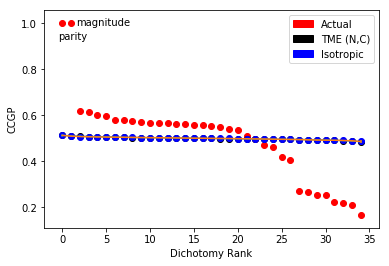

In [572]:
sample_ccgp.sort(reverse=True)

CCGP_means = np.sort(CCGP_means)
CCGP_means = CCGP_means[::-1]

plt.scatter(range(0,len(sample_ccgp)),sample_ccgp, color = "red")
plt.scatter(range(0,len(CCGP_means)),CCGP_means, color = "black")
plt.errorbar(range(0,len(CCGP_means)),CCGP_means, yerr = 2*CCGP_sd)

plt.scatter(range(0,len(random_CCGP_means)),random_CCGP_means, color = "blue")
plt.errorbar(range(0,len(random_CCGP_means)),random_CCGP_means, yerr = 2*random_CCGP_sd)



plt.ylabel("CCGP")
plt.xlabel("Dichotomy Rank")
plt.annotate(xy=[1.6,0.99], s = "magnitude")
plt.annotate(xy=[-0.5,0.93], s = "parity")


red_patch = mpatches.Patch(color='red', label='Actual')
black_patch = mpatches.Patch(color='black', label='TME (N,C)')
blue_patch = mpatches.Patch(color='blue', label='Isotropic')
plt.legend(handles=[red_patch, black_patch, blue_patch])



#plt.show()
plt.savefig('/Users/anastasia/Desktop/randtensor/CCGP score.png') 

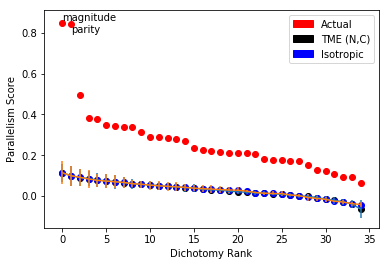

In [571]:
max_sample_PS.sort(reverse=True)

PS_means = np.sort(PS_means)
PS_means = PS_means[::-1]

plt.scatter(range(0,len(max_sample_PS)),max_sample_PS, color = "red")
plt.scatter(range(0,len(PS_means)),PS_means, color = "black")
plt.errorbar(range(0,len(PS_means)),PS_means, yerr = 2*PS_sd)

plt.scatter(range(0,len(random_PS_means)),random_PS_means, color = "blue")
plt.errorbar(range(0,len(random_PS_means)),random_PS_means, yerr = 2*random_PS_sd)

plt.ylabel("Parallelism Score")
plt.xlabel("Dichotomy Rank")
plt.annotate(xy=[0,0.86], s = "magnitude")
plt.annotate(xy=[1,0.8], s = "parity")


red_patch = mpatches.Patch(color='red', label='Actual')
black_patch = mpatches.Patch(color='black', label='TME (N,C)')
blue_patch = mpatches.Patch(color='blue', label='Isotropic')
plt.legend(handles=[red_patch, black_patch, blue_patch])


#plt.show()

plt.savefig('/Users/anastasia/Desktop/randtensor/Parallelism score.png') 

In [395]:
PS_ranks[2].shape

(35, 34)

<Figure size 2880x144 with 0 Axes>

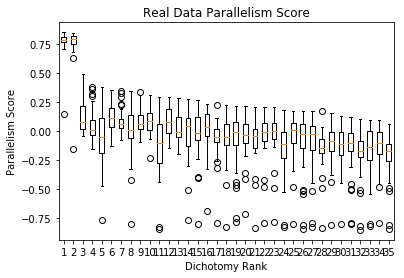

In [426]:
#boxplots for real data
fig = plt.figure(figsize=(40, 2))

fig, ax = plt.subplots()

ax.boxplot(sample_PS)
plt.title('Real Data Parallelism Score')
plt.ylabel("Parallelism Score")

plt.xlabel("Dichotomy Rank")

#plt.show()

plt.savefig('/Users/anastasia/Desktop/randtensor/Real Data PS.pdf')    

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

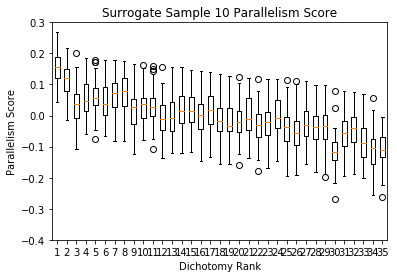

In [429]:
#boxplots for surrogate 

for sample in range(10):
    plt.clf()
    
    new_data = PS_ranks[sample]
    
    #for i in range(35):
    #    for j in range(34):    
    
    
    fig, ax = plt.subplots()

    ax.boxplot(new_data.T)
    
    plt.ylabel("Parallelism Score")

    plt.xlabel("Dichotomy Rank")
    plt.ylim(-0.4,0.3)
 
    plt.title('Surrogate Sample ' + str(sample+1) + ' Parallelism Score')
    #plt.show()
    plt.savefig('/Users/anastasia/Desktop/randtensor/Surrogate Sample PS ' + str(sample+1) + '.pdf')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

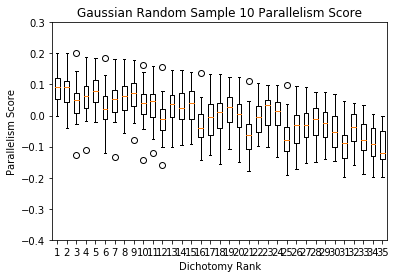

In [430]:
#boxplots for random


for sample in range(10):
    plt.clf()
    
    new_data_np = np.zeros((35,34))
    for i in range(35):
        new_data_np[i] = np.array(PS_ranks_random[sample][i])
        

    
    fig, ax = plt.subplots()

    ax.boxplot(new_data_np.T)
    
    plt.ylabel("Parallelism Score")

    plt.xlabel("Dichotomy Rank")
    plt.ylim(-0.4,0.3)
 
    plt.title('Gaussian Random Sample ' + str(sample+1) + ' Parallelism Score')
    #plt.show()
    plt.savefig('/Users/anastasia/Desktop/randtensor/Random Sample PS ' + str(sample+1) + '.pdf')
   

In [724]:
#index = 1

#random_labels = np.ones(8000)

#for a in range(8000):
#    random_labels[a] = index
    
#    if index < 8:
#        index+= 1
#    elif index == 8:
#        index = 1
#print(random_labels)

surrogates = rand.sampleTensors(1000)
dataset = np.stack(surrogates)
dataset = np.swapaxes(dataset,1,2)
dataset = np.reshape(dataset, (8000, 100), order = 'f')


In [725]:
new_dataset = np.ones((8000,100))
new_labels = np.ones(8000)


counter = 0
for i in range(0,1000):
    start = i
    
    for j in range(0,8):
        
        new_dataset[counter] = dataset[start + j*1000]
        new_labels[counter] = surrogate_labels[start + j*1000]
        
        counter += 1



array([1., 2., 3., ..., 6., 7., 8.])

In [710]:
colors = np.ones(len(new_labels), dtype=object)
index = 0
for lab in new_labels:
    if int(lab) == 1 or int(lab) == 3:
        color = 'firebrick'
    if int(lab) == 2 or int(lab) == 4:
        color = 'lightskyblue'
    if int(lab) == 5 or int(lab) == 7:
        color = 'lightcoral'
    if int(lab) == 6 or int(lab) == 8:
        color = 'darkblue'
    colors[index] = color
    index+= 1


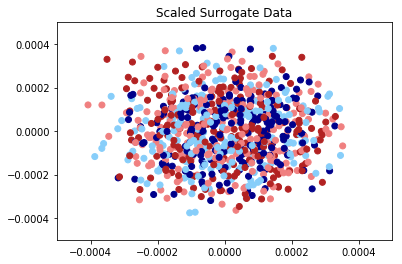

In [733]:
new_dataset_scaled = new_dataset / 2266838.4355222145

embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(new_dataset_scaled[:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors[:800])
plt.title("Scaled Surrogate Data")
#plt.xlim(-0.0000005, 0.0000005)
#plt.ylim(-0.0000005, 0.0000005)

plt.xlim(-0.0005, 0.0005)
plt.ylim(-0.0005, 0.0005)

plt.show()

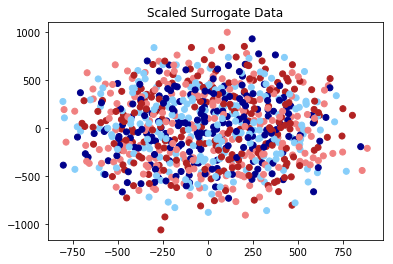

In [727]:
embedding = manifold.MDS(n_components=2)

train_image_transformed = embedding.fit_transform(new_dataset[:800])
plt.scatter(train_image_transformed[:,0], train_image_transformed[:,1], c =colors[:800])
plt.title("Scaled Surrogate Data")
#plt.xlim(-0.0000005, 0.0000005)
#plt.ylim(-0.0000005, 0.0000005)
plt.show()

In [222]:
sizes = (N, C)
covs = [sigma_N,sigma_C]

rand = r.randtensor(sizes)
rand.fitMaxEntropy(covs)
new_surrogates = rand.sampleTensors(100)

new_dataset = np.stack(new_surrogates)
data_N = np.swapaxes(new_dataset,0,1)
print(data_N.shape)

#(T,N,C) to (C,N,T)
data_C = np.swapaxes(new_dataset,0,2)
print(data_C.shape)

sigma_N_data = np.reshape(data_N, (100, (100*8)))

sigma_C_data = np.reshape(data_C, (8, (100*100)))

new_sigma_N = np.cov(sigma_N_data)
new_sigma_C = np.cov(sigma_C_data)

fitting max entropy...
(100, 100, 8)
(8, 100, 100)


In [228]:
#test covariance mean and SD

mean_N = np.zeros((100, 100))
mean_C = np.zeros((8,8))
SD_N_sums = np.zeros((100, 100, 100))
SD_C_sums = np.zeros((100, 8,8))

SD_N = np.zeros((100, 100))
SD_C = np.zeros((8,8))

for i in range(len(new_dataset)):
    
    C_data = new_dataset[i].T
    
    N_data = new_dataset[i]
    
    N_cov = np.zeros((100,100))

    for a in range(100):
    
        for b in range(100):
    
            N_cov[a,b] = np.matmul(N_data[a,:], N_data[b,:].T)
        
        
    C_cov = np.zeros((8,8))
        
    for a in range(8):
    
        for b in range(8):
    
            C_cov[a,b] = np.matmul(C_data[a,:], C_data[b,:].T)
    
    
    
    mean_N = mean_N + N_cov
    
    mean_C = mean_C + C_cov
    
    SD_N_sums[i] = N_cov
    
    SD_C_sums[i] = C_cov
    

mean_N = mean_N/len(new_dataset)
mean_C = mean_C/len(new_dataset) 
        
        
for j in range(100):
    for k in range(100):
        sd_sum = []
        
        for i in range(len(new_dataset)):
            sd_sum.append(SD_N_sums[i][j,k])
            
        SD_N[j,k] = np.std(np.array(sd_sum))
        
        
for j in range(8):
    for k in range(8):
        sd_sum = []
        
        for i in range(len(new_dataset)):
            sd_sum.append(SD_C_sums[i][j,k]) 
            
        SD_C[j,k] = np.std(np.array(sd_sum))
        

        

In [ ]:
percent_diff_C = (100*abs(mean_C-sigma_C))/sigma_C
percent_diff_N = (100*abs(mean_N-sigma_N))/sigma_N
print(percent_diff_N)
print(percent_diff_C)
print(SD_N)
print(SD_C)

In [45]:
#sample from isotropic normal to get 1000x100x8 dataset

random_data = np.ones((1000, 100, 8))

for i in range(1000):
    for j in range(100):
        for k in range(8):
            random_data[i,j,k] = np.random.normal()

In [520]:
# run same analyses for random data

PS_ranks_random = []
#CCGP_ranks_random = np.ones((10,35))
index = 0
for i in range(3):
    random_data = np.ones((1000, 100, 8))

    for i in range(1000):
        for j in range(100):
            for k in range(8):
                random_data[i,j,k] = np.random.normal()
                
    random_data = np.swapaxes(random_data,1,2)
    random_data = np.reshape(random_data, (8000, 100))
    
    
    #CCGP = []
    PS = []

    for d in dichotomies:
        #CCGP_score = ccgp(random_data, dichotomy = d, labels = surrogate_labels)          
        pscore = p_score(random_data, dichotomy = d, labels = surrogate_labels)
        #CCGP.append(CCGP_score)
        PS.append(pscore)
        #print(CCGP_score)
        print(pscore)
        
    PS.sort(reverse = True)
    PS_ranks_random.append(PS)
                      
    #CCGP.sort(reverse = True)
    #CCGP_ranks_random[index] = np.array(CCGP)
    
    index +=1
    

[0.5085, 0.495, 0.5045, 0.495, 0.502, 0.4865, 0.5005, 0.52, 0.501, 0.504, 0.5185, 0.514, 0.504, 0.5, 0.502, 0.4955]
0.5031874999999999
[0.512, 0.4785, 0.5025, 0.505, 0.5155, 0.4985, 0.4915, 0.513, 0.505, 0.496, 0.496, 0.5175, 0.514, 0.498, 0.479, 0.5105]
0.5020312499999999
[0.5015, 0.478, 0.4975, 0.4955, 0.5025, 0.5115, 0.483, 0.4955, 0.478, 0.4835, 0.4785, 0.4885, 0.5095, 0.506, 0.486, 0.502]
0.4935625
[0.5185, 0.522, 0.5215, 0.505, 0.513, 0.514, 0.511, 0.508, 0.493, 0.489, 0.51, 0.4945, 0.5065, 0.5165, 0.513, 0.512]
0.5092187499999999
[0.4815, 0.4985, 0.488, 0.4915, 0.5055, 0.5065, 0.507, 0.496, 0.475, 0.503, 0.4885, 0.4855, 0.491, 0.5075, 0.5025, 0.484]
0.49446875
[0.488, 0.483, 0.4915, 0.48, 0.496, 0.493, 0.481, 0.487, 0.5045, 0.4995, 0.4955, 0.49, 0.491, 0.4925, 0.4725, 0.488]
0.4895625
[0.501, 0.5, 0.5085, 0.4995, 0.507, 0.5035, 0.4805, 0.5045, 0.491, 0.5055, 0.5, 0.503, 0.487, 0.503, 0.4935, 0.5065]
0.499625
[0.5025, 0.5, 0.517, 0.5135, 0.4975, 0.508, 0.51, 0.492, 0.503, 0.513, 

[0.514, 0.516, 0.5075, 0.4975, 0.4865, 0.5065, 0.51, 0.5065, 0.4925, 0.518, 0.5085, 0.49, 0.493, 0.479, 0.4915, 0.4805]
0.49984375
[0.5275, 0.518, 0.4925, 0.494, 0.4995, 0.52, 0.51, 0.5075, 0.4925, 0.5045, 0.4835, 0.4995, 0.4995, 0.505, 0.5, 0.493]
0.50290625
[0.4725, 0.5065, 0.484, 0.4905, 0.486, 0.4935, 0.4955, 0.4975, 0.485, 0.493, 0.5015, 0.48, 0.477, 0.4795, 0.503, 0.491]
0.48975
[0.5005, 0.523, 0.508, 0.5175, 0.514, 0.5135, 0.514, 0.5065, 0.497, 0.499, 0.5005, 0.4975, 0.493, 0.497, 0.5065, 0.5015]
0.5055624999999999
[0.495, 0.4905, 0.482, 0.49, 0.4875, 0.5, 0.4915, 0.5095, 0.4825, 0.4955, 0.473, 0.4875, 0.5075, 0.5115, 0.501, 0.5075]
0.4945
[0.505, 0.504, 0.4895, 0.4875, 0.4905, 0.482, 0.5025, 0.4895, 0.481, 0.507, 0.487, 0.4885, 0.504, 0.4865, 0.5045, 0.493]
0.49387499999999995
[0.5125, 0.519, 0.5075, 0.514, 0.5095, 0.5075, 0.5035, 0.5015, 0.495, 0.501, 0.491, 0.4985, 0.515, 0.504, 0.5055, 0.507]
0.5057499999999999
[0.5175, 0.5075, 0.492, 0.503, 0.519, 0.515, 0.5075, 0.504, 0.50

[0.493, 0.5, 0.518, 0.502, 0.486, 0.495, 0.516, 0.491, 0.4855, 0.5075, 0.512, 0.5135, 0.4965, 0.5025, 0.519, 0.505]
0.50265625
[0.507, 0.494, 0.5225, 0.5035, 0.492, 0.5125, 0.5145, 0.4945, 0.5045, 0.5135, 0.527, 0.516, 0.485, 0.5095, 0.5135, 0.5135]
0.5076875
[0.4985, 0.491, 0.5035, 0.4885, 0.4795, 0.505, 0.5205, 0.4995, 0.497, 0.5135, 0.5105, 0.5045, 0.5005, 0.4985, 0.5075, 0.5185]
0.50228125
[0.5015, 0.4885, 0.5115, 0.494, 0.4855, 0.4875, 0.5165, 0.484, 0.503, 0.4985, 0.5105, 0.5085, 0.505, 0.502, 0.5165, 0.5225]
0.5022187499999999
[0.5205, 0.514, 0.5185, 0.5075, 0.5145, 0.508, 0.5265, 0.499, 0.5135, 0.5125, 0.518, 0.5075, 0.519, 0.499, 0.5115, 0.5135]
0.5126875
[0.5145, 0.5085, 0.5255, 0.512, 0.507, 0.507, 0.5075, 0.4895, 0.5155, 0.505, 0.5005, 0.5085, 0.5085, 0.4945, 0.499, 0.4865]
0.50559375
[0.488, 0.4915, 0.5, 0.501, 0.483, 0.4805, 0.5135, 0.4865, 0.489, 0.495, 0.488, 0.5015, 0.48, 0.47, 0.5055, 0.4775]
0.49065624999999996
[0.512, 0.4855, 0.497, 0.494, 0.499, 0.504, 0.516, 0.493

[0.5015, 0.4885, 0.4805, 0.4965, 0.508, 0.489, 0.504, 0.511, 0.5105, 0.51, 0.494, 0.5115, 0.4805, 0.4745, 0.505, 0.502]
0.4979375
[0.4985, 0.488, 0.4905, 0.4895, 0.496, 0.4795, 0.495, 0.4895, 0.5005, 0.512, 0.503, 0.505, 0.4995, 0.5005, 0.5025, 0.5075]
0.4973125
[0.492, 0.4815, 0.495, 0.5075, 0.504, 0.487, 0.4925, 0.5065, 0.5065, 0.4905, 0.5055, 0.4965, 0.495, 0.479, 0.489, 0.504]
0.49575
[0.5115, 0.5075, 0.481, 0.4905, 0.511, 0.508, 0.4945, 0.498, 0.521, 0.5195, 0.4955, 0.499, 0.5195, 0.5005, 0.505, 0.5255]
0.5054687499999999
[0.5085, 0.524, 0.519, 0.517, 0.519, 0.5135, 0.511, 0.5145, 0.507, 0.518, 0.516, 0.498, 0.513, 0.5025, 0.521, 0.5175]
0.51371875
[0.506, 0.476, 0.4925, 0.493, 0.4895, 0.4885, 0.488, 0.498, 0.506, 0.486, 0.5025, 0.507, 0.4945, 0.486, 0.4995, 0.518]
0.49568749999999995
[0.494, 0.4915, 0.4885, 0.502, 0.505, 0.5065, 0.509, 0.4955, 0.5105, 0.503, 0.5165, 0.508, 0.508, 0.509, 0.5255, 0.5175]
0.505625
[0.5005, 0.4975, 0.5055, 0.4965, 0.505, 0.496, 0.489, 0.4955, 0.5165,

[0.5035, 0.499, 0.511, 0.5, 0.5095, 0.5045, 0.5215, 0.5045, 0.512, 0.5045, 0.5045, 0.5105, 0.519, 0.4975, 0.511, 0.4965]
0.5068125
[0.4805, 0.481, 0.501, 0.485, 0.506, 0.4895, 0.488, 0.4925, 0.4925, 0.4755, 0.5035, 0.5025, 0.485, 0.4835, 0.492, 0.4825]
0.49003125000000003
[0.4955, 0.5075, 0.499, 0.491, 0.4845, 0.485, 0.4965, 0.4965, 0.491, 0.4905, 0.509, 0.501, 0.485, 0.504, 0.4875, 0.4885]
0.49449999999999994
[0.4895, 0.4925, 0.519, 0.481, 0.491, 0.4875, 0.4905, 0.499, 0.4885, 0.509, 0.498, 0.489, 0.4975, 0.4965, 0.494, 0.508]
0.49565625
[0.5105, 0.5045, 0.5195, 0.502, 0.5025, 0.491, 0.5365, 0.4955, 0.4945, 0.495, 0.514, 0.501, 0.4965, 0.497, 0.5025, 0.487]
0.50309375
[0.5045, 0.483, 0.512, 0.4965, 0.4825, 0.482, 0.5035, 0.4805, 0.5055, 0.483, 0.509, 0.5, 0.488, 0.4815, 0.488, 0.4825]
0.492625
[0.508, 0.517, 0.5105, 0.5135, 0.4935, 0.4785, 0.5095, 0.4815, 0.488, 0.483, 0.486, 0.4765, 0.5085, 0.4965, 0.493, 0.5065]
0.49687499999999996
[0.492, 0.4955, 0.494, 0.4855, 0.471, 0.4725, 0.463

[0.5195, 0.5095, 0.5285, 0.5125, 0.5155, 0.5095, 0.5085, 0.498, 0.499, 0.509, 0.5215, 0.5, 0.522, 0.516, 0.5215, 0.516]
0.5129062499999999
[0.4805, 0.501, 0.507, 0.4925, 0.4985, 0.508, 0.528, 0.5035, 0.489, 0.5005, 0.509, 0.494, 0.495, 0.509, 0.514, 0.4825]
0.50075
[0.4845, 0.5055, 0.4995, 0.4825, 0.5015, 0.507, 0.525, 0.5015, 0.491, 0.495, 0.5055, 0.4895, 0.4975, 0.5105, 0.5145, 0.511]
0.50134375
[0.501, 0.512, 0.519, 0.512, 0.511, 0.5075, 0.521, 0.511, 0.509, 0.517, 0.53, 0.4955, 0.4975, 0.5105, 0.5075, 0.5]
0.51009375
[0.507, 0.496, 0.5, 0.4955, 0.497, 0.484, 0.505, 0.5035, 0.4955, 0.508, 0.5115, 0.499, 0.49, 0.49, 0.503, 0.4975]
0.49890624999999994
[0.4895, 0.4925, 0.4905, 0.5045, 0.4945, 0.501, 0.5, 0.498, 0.4955, 0.4865, 0.4855, 0.486, 0.4945, 0.5, 0.489, 0.492]
0.49371875
[0.512, 0.4985, 0.5095, 0.5, 0.497, 0.4965, 0.4965, 0.494, 0.509, 0.4995, 0.488, 0.498, 0.491, 0.507, 0.499, 0.497]
0.49953125
[0.497, 0.5015, 0.5075, 0.504, 0.484, 0.494, 0.5, 0.501, 0.5075, 0.511, 0.4945, 0.4

In [106]:
#plot random_data stuff

In [543]:
PS_ranks_random = []
#CCGP_ranks_random = np.ones((10,35))
index = 0
for i in range(3):
    random_data = np.ones((1000, 100, 8))

    for i in range(1000):
        for j in range(100):
            for k in range(8):
                random_data[i,j,k] = np.random.normal()
                
    random_data = np.swapaxes(random_data,1,2)
    random_data = np.reshape(random_data, (8000, 100))
    
    
    #CCGP = []
    PS = []

    for d in dichotomies:
        #CCGP_score = ccgp(random_data, dichotomy = d, labels = surrogate_labels)          
        pscore = p_score(random_data, dichotomy = d, labels = surrogate_labels)
        #CCGP.append(CCGP_score)
        PS.append(pscore)
        #print(CCGP_score)
        print(pscore)
        
    PS.sort(reverse = True)
    PS_ranks_random.append(PS)
                      
    #CCGP.sort(reverse = True)
    #CCGP_ranks_random[index] = np.array(CCGP)
    
    index +=1
    
    

0.015397205857022145
0.010430315563973641
0.007718678904669736
0.002391252640210988
0.0009907618842251806
0.00158591685242661
0.011002758130375143
0.004851611650507703
0.016499117839545267
0.021209498518813395
0.009949928464868273
0.021314937981010012
-0.006670784577266931
-0.01321423471365283
0.0047049663759972885
0.01155557399881504
-0.0067956986510085155
0.003614106812540062
-0.003516413697351939
-0.003096709410494931
0.010982047467005498
0.022782367125481626
0.0042294193211936774
0.013080084393157138
0.022782367125481626
-0.007827758948707632
0.0057442759147420756
-0.007142499538323618
0.003917627473490743
0.008223761675798623
0.0019919130369787878
-0.0289276995405088
-0.014724954260380124
-0.028657413877986617
0.006963632965835329
-0.01477651231888831
0.005070683280377637
-0.017674718196916607
-0.00825545602876564
-0.019348725510445156
0.017215927594927277
-0.009182077522460126
0.017592638954629765
-0.015436843231088751
-0.020804089162023733
-0.01781225411154566
0.0037551013599122

-0.01472966266485267
-0.02222117452639908
-0.004388356655459325
-0.0007592824145063676
0.004129375307555494
0.0002119338029923281
0.0023942037685480773
0.0032456915451489965
0.010929622282231034
0.009539031476134625
0.015537229932452972
0.015537229932452972
0.0040418405907827444
-0.0016500628372764555
0.011444470383544625
-0.004504950550569915
0.025820223694199507
0.013114746490030155
0.012798464003636854
0.00667056857012217
0.009379861650482619
0.01690358764573607
0.02177537677528222
0.03352048249451825
0.010442957739465526
-0.007578755010291266
-0.0010321698883481302
0.006054835097995922
0.0079636871763565
0.03358958880510632
0.01589658927500127
0.0009102349326954333
0.004481131553662917
0.013429329841788216
-0.0003303922421333096
0.0235788948235609
0.03358958880510632
-0.0036362138375523306
0.005471611244786357
0.0027927172054436795
-0.0035502320754339477
0.024107884012495785
0.009464206695931565
-0.0024815929660048633
0.006820689840562045
-0.013425163424813556
-0.006526429246046178

-0.03289064243912707
-0.034643369644610573
-0.03327426711486231
-0.004532242743503755
-0.012423554045705436
0.001100139191180089
0.0009459672247652019
-0.01135763033797418
-0.0029675611182200124
-0.023615495090441644
-0.02909158879250866
-0.022004441242877287
-0.02105670344800773
-0.028456309754063765
-0.021311830526438442
-0.029898007745703146
-0.028490978191108025
-0.029412413838171066
-0.02094086869161211
-0.026176996133379794
-0.018936865243059844
0.001100139191180089
-0.018653004307221187
-0.016422683499537863
0.0022188487433200087
0.011612284461040538
-0.023567146786731785
-0.015593746884242176
-0.0013217834999027381
0.003050416452910251
0.015332593985866427
0.004141853498853192
-0.008976646227771397
-0.024277494674631042
-0.010773669631680218
-0.00043964865435131874
-0.01602327202106358
-0.028196723019801643
-0.011255975502429245
-0.03337960023028287
-0.02331962578955698
-0.016039639782653534
-0.028410355106906704
-0.043757052937169166
-0.0006200722010310513
-0.02232452146453614

0.07577369000377397
0.050529277504418456
0.02255338927824987
0.07225037249046966
0.05575858969999374
0.04132988019824503
0.052785153833769693
0.08314149681529338
-0.04116966960462873
-0.015589730186058819
-0.0384462852906687
0.0020924350786488306
-0.04705939601312775
-0.034761079384345375
-0.08471074421760018
-0.060041623319583105
-0.06247036036357405
-0.030750836329607772
-0.06985500892117426
-0.06208654865686523
-0.05128016195873877
-0.012388246334985212
-0.029333128811351916
0.005278848807399578
-0.024952484639947703
-0.031157701818884227
-0.044643966345752586
-0.03227500102184925
-0.024731979140899
-0.013353405593280005
-0.008235481868430074
-0.01453072284729245
0.005278848807399578
0.08900835218418057
0.10234738231853145
0.10378407261842307
0.08101882544359305
0.12024985789906487
0.08301413783195542
0.04672911421281647
0.06333637165673764
0.06771457220786788
0.0767177932081042
0.08465311114993333
0.07723326746527952
0.08389156045362099
0.05998709402064191
0.09253340232778082
0.099

-0.0708921091065253
-0.07763277576254424
-0.07948875236779117
-0.0862929613489541
-0.08650447119998866
-0.09215731516819958
-0.04626755189924407
-0.05921252911336063
-0.052038496215287354
-0.06807664324681474
-0.04434887434768333
-0.04575225003504611
-0.04434887434768333
-0.028155131639588743
0.017009238089245374
-0.010305722078474962
0.025184134615167664
0.021227078411836568
0.010485621045445568
0.002533598627901916
0.05381683098195901
-0.009659175331205232
0.055256792843241295
0.024968095043716033
0.04094869602870278
-0.0011737671471258003
0.03671389556105842
-0.029002734518269742
0.02842292124462376
0.009018714525379473
0.034440264965881505
0.0030319293039808657
-0.00719761252920751
-0.023695611158090036
-0.01100287427094652
-0.017698114362036565
0.00769951087748506
0.055256792843241295
0.019032434258465788
0.020779829571416428
0.020292121945038433
0.01852435281846295
0.0341603909942368
0.030884213038002185
0.045395178586115456
0.04513152624429505
0.02489002805337005
0.0229136564049

-0.06634317138643056
-0.06248719355492739
-0.06638772394757957
-0.06914406846880558
-0.043844217398867916
-0.03472905063559102
-0.06655589676883764
-0.0658164751752558
-0.06574870999117115
-0.07095552053546911
-0.032320676038566684
-0.025556545372692065
-0.05808077977263759
-0.05660675003720412
-0.05700410599804251
-0.06289304784081286
-0.043238842549211405
-0.04692111147518792
-0.06960883560911578
-0.07720795914874484
-0.06855732806013913
-0.07363027865586502
-0.025556545372692065
0.10922857872884711
0.08232858554002119
0.114718744565677
0.07451119687679202
0.08801204236292504
0.07529606155017432
0.09944876691424007
0.07320772899099726
0.09280639397831814
0.0595708872703262
0.06458145430570654
0.05867944974629109
0.1035212282435033
0.06441535453458154
0.08912546243628626
0.056711124916251895
0.05750986460240183
0.06312108920753284
0.08790796753046534
0.07361800960688428
0.07088261879559388
0.06484935662970681
0.06600421324211699
0.07268217773593648
0.114718744565677
0.0378811589002944

0.010060049026331844
-0.023624758755358237
-0.013706487729680333
0.0014962532040818446
0.03185251745756611
0.009592517659525072
0.010020113969281102
-0.028145231467809992
0.053149888982154996
0.038020906574141415
0.021178905699565178
0.02444820342992016
0.013162184363123266
-0.025197655752931376
-0.018171793413320037
0.00513194399571526
-0.013777962845098876
0.03905005472479389
0.0029373653030778622
-0.013695652842037002
-0.02806800455362354
0.01897288858996292
0.005430217106248678
0.06839546014341476
0.03271430532341975
0.0076147972298786365
-0.014071723701695146
-0.006675365235341291
-0.0027332889637650785
0.03974737612226733
0.02415407469690401
0.03389101044843015
0.013447255376220556
0.06839546014341476
0.06547959472984179
0.04228055224011131
0.06382450881156979
0.013246473631968812
0.05239522642647051
0.02648420505671188
0.04551010039891685
0.02121090700531747
0.03814299308127924
0.011930608038176194
0.02715320246104807
0.024719578914352912
0.05697116146720493
0.008334060036256198

In [1]:
PS_ranks_random[0]

NameError: name 'PS_ranks_random' is not defined

In [559]:
random_PS_means = np.ones(35)

random_PS_sd = np.ones(35)


for b in range(35):
    sample = []
    for a in range(3):
        sample.append(PS_ranks_random[a][b])

    random_PS_means[b] = np.mean(sample)
    random_PS_sd[b] = np.std(sample)
    


In [547]:

random_CCGP_means = np.ones(35)
random_CCGP_sd = np.ones(35)

index = 0
for a in range(35):
    
    random_CCGP_means[index] = np.mean(CCGP_ranks_random[:,a])
    random_CCGP_sd[index] = np.std(CCGP_ranks_random[:,a])
    
    index+=1